#  DATA MERGING,DATA CLEANING AND DICTIONARY CREATION

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
players_df=pd.read_excel("C:/Users/HP/Desktop/Capstone Project/players.xlsx")
games_df=pd.read_excel("C:/Users/HP/Desktop/Capstone Project/games.xlsx")
game_lineups_df=pd.read_excel("C:/Users/HP/Desktop/Capstone Project/game_lineups.xlsx")
game_events_df=pd.read_excel("C:/Users/HP/Desktop/Capstone Project/game_events.xlsx")
appearance_df=pd.read_excel("C:/Users/HP/Desktop/Capstone Project/appearances.xlsx")

## Players data

In [5]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    152 non-null    int64         
 1   name                         152 non-null    object        
 2   last_season                  152 non-null    int64         
 3   current_club_id              152 non-null    int64         
 4   player_code                  152 non-null    object        
 5   country_of_birth             152 non-null    object        
 6   date_of_birth                152 non-null    datetime64[ns]
 7   sub_position                 152 non-null    object        
 8   position                     152 non-null    object        
 9   foot                         141 non-null    object        
 10  height_in_cm                 149 non-null    float64       
 11  market_value_in_eur          114 non-null    

## Games data

In [7]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 3268 non-null   int64         
 1   competition_id          3268 non-null   object        
 2   season                  3268 non-null   int64         
 3   round                   3268 non-null   object        
 4   date                    3268 non-null   datetime64[ns]
 5   home_club_goals         3268 non-null   int64         
 6   away_club_goals         3268 non-null   int64         
 7   home_club_position      2789 non-null   float64       
 8   away_club_position      2789 non-null   float64       
 9   home_club_manager_name  3263 non-null   object        
 10  away_club_manager_name  3263 non-null   object        
 11  stadium                 3268 non-null   object        
 12  attendance              3153 non-null   float64 

## Game lineups data

In [9]:
game_lineups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_lineups_id  219 non-null    object
 1   game_id          219 non-null    int64 
 2   type             219 non-null    object
 3   number           219 non-null    int64 
 4   player_id        219 non-null    int64 
 5   player_name      219 non-null    object
 6   team_captain     219 non-null    int64 
 7   position         219 non-null    object
dtypes: int64(4), object(4)
memory usage: 13.8+ KB


## Game events data

In [11]:
game_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_event_id     1849 non-null   object        
 1   date              1849 non-null   datetime64[ns]
 2   game_id           1849 non-null   int64         
 3   minute            1849 non-null   int64         
 4   type              1849 non-null   object        
 5   player_id         1849 non-null   int64         
 6   description       916 non-null    object        
 7   player_in_id      1155 non-null   float64       
 8   player_assist_id  140 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 130.1+ KB


## Appearance data

In [13]:
appearance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   appearance_id   3568 non-null   object        
 1   game_id         3568 non-null   int64         
 2   player_id       3568 non-null   int64         
 3   date            3568 non-null   datetime64[ns]
 4   player_name     3568 non-null   object        
 5   competition_id  3568 non-null   object        
 6   yellow_cards    3568 non-null   int64         
 7   red_cards       3568 non-null   int64         
 8   goals           3568 non-null   int64         
 9   assists         3568 non-null   int64         
 10  minutes_played  3568 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 306.8+ KB


#### Merging data

In [15]:
print('player data',players_df.columns,players_df.shape)
print('games data',games_df.columns,games_df.shape)
print('game lineup data',game_lineups_df.columns,game_lineups_df.shape)
print('game events data',game_events_df.columns,game_events_df.shape)
print('appearence data',appearance_df.columns,appearance_df.shape)

player data Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object') (152, 15)
games data Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object') (3268, 20)
game lineup data Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object') (219, 8)
game events data Index(['game_event_id', 'date', 'game_id', 'minute', 'type',

In [16]:
merged_data1 = pd.merge(appearance_df, games_df, on='game_id', how='inner')
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           3568 non-null   object        
 1   game_id                 3568 non-null   int64         
 2   player_id               3568 non-null   int64         
 3   date_x                  3568 non-null   datetime64[ns]
 4   player_name             3568 non-null   object        
 5   competition_id_x        3568 non-null   object        
 6   yellow_cards            3568 non-null   int64         
 7   red_cards               3568 non-null   int64         
 8   goals                   3568 non-null   int64         
 9   assists                 3568 non-null   int64         
 10  minutes_played          3568 non-null   int64         
 11  competition_id_y        3568 non-null   object        
 12  season                  3568 non-null   int64   

In [17]:
merged_data2 = pd.merge(merged_data1, game_events_df, on='game_id', how='inner')
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           1339 non-null   object        
 1   game_id                 1339 non-null   int64         
 2   player_id_x             1339 non-null   int64         
 3   date_x                  1339 non-null   datetime64[ns]
 4   player_name             1339 non-null   object        
 5   competition_id_x        1339 non-null   object        
 6   yellow_cards            1339 non-null   int64         
 7   red_cards               1339 non-null   int64         
 8   goals                   1339 non-null   int64         
 9   assists                 1339 non-null   int64         
 10  minutes_played          1339 non-null   int64         
 11  competition_id_y        1339 non-null   object        
 12  season                  1339 non-null   int64   

In [18]:
merged_data2 = merged_data2.rename(columns={'player_id_x': 'player_id'})


In [19]:
merged_data3 = pd.merge(merged_data2, game_lineups_df, on='player_id', how='inner')
merged_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           4199 non-null   object        
 1   game_id_x               4199 non-null   int64         
 2   player_id               4199 non-null   int64         
 3   date_x                  4199 non-null   datetime64[ns]
 4   player_name_x           4199 non-null   object        
 5   competition_id_x        4199 non-null   object        
 6   yellow_cards            4199 non-null   int64         
 7   red_cards               4199 non-null   int64         
 8   goals                   4199 non-null   int64         
 9   assists                 4199 non-null   int64         
 10  minutes_played          4199 non-null   int64         
 11  competition_id_y        4199 non-null   object        
 12  season                  4199 non-null   int64   

In [20]:
whole_data = pd.merge(merged_data3, players_df, on='player_id', how='inner')
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_id                    4199 non-null   int64         
 3   date_x                       4199 non-null   datetime64[ns]
 4   player_name_x                4199 non-null   object        
 5   competition_id_x             4199 non-null   object        
 6   yellow_cards                 4199 non-null   int64         
 7   red_cards                    4199 non-null   int64         
 8   goals                        4199 non-null   int64         
 9   assists                      4199 non-null   int64         
 10  minutes_played               4199 non-null   int64         
 11  competition_id_y             4199 non-null 

In [21]:
whole_data.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
competition_id_y                  0
season                            0
round                             0
date_y                            0
home_club_goals                   0
away_club_goals                   0
home_club_position              718
away_club_position              718
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      396
referee                          32
home_club_formation            4199
away_club_formation            4199
home_club_name                  209
away_club_name              

##### Cleaning data

In [23]:
whole_data['attendance']

0       45033.0
1       45033.0
2       45033.0
3       45033.0
4       45033.0
         ...   
4194     3200.0
4195     3200.0
4196     3200.0
4197     3200.0
4198     3200.0
Name: attendance, Length: 4199, dtype: float64

In [24]:
columns_to_drop = ['competition_id_y','game_id_y','player_id_y','date_x','date_y','player_name_x','agent_name','description','player_in_id','player_assist_id','home_club_formation','away_club_formation','home_club_position','away_club_position','home_club_name','contract_expiration_date','position_y','type_y']
# Dropping the columns
df = whole_data.drop(columns=columns_to_drop)
df.head()

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,2023,24,timothy-chandler,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000.0
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,2023,24,timothy-chandler,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000.0
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,2023,24,timothy-chandler,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000.0
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,2023,24,timothy-chandler,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000.0
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,2023,24,timothy-chandler,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000.0


In [25]:
df.shape

(4199, 41)

##### Missing value treatment

In [27]:
df.isnull().sum()

appearance_id                    0
game_id_x                        0
player_id                        0
competition_id_x                 0
yellow_cards                     0
red_cards                        0
goals                            0
assists                          0
minutes_played                   0
season                           0
round                            0
home_club_goals                  0
away_club_goals                  0
home_club_manager_name           0
away_club_manager_name           0
stadium                          0
attendance                     396
referee                         32
away_club_name                  22
aggregate                        0
competition_type                 0
game_event_id                    0
date                             0
minute                           0
type_x                           0
game_lineups_id                  0
number                           0
player_name_y                    0
team_captain        

In [28]:
df['referee'].fillna(df['referee'].mode()[0],inplace=True)

In [29]:
df['away_club_name'].fillna(df['away_club_name'].mode()[0],inplace=True)

In [30]:
df['market_value_in_eur'].fillna(df['market_value_in_eur'].mean(),inplace=True)

In [31]:
df['attendance'].fillna(df['attendance'].mean(),inplace=True)

In [32]:
df.isnull().sum()

appearance_id                  0
game_id_x                      0
player_id                      0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
game_lineups_id                0
number                         0
player_name_y                  0
team_captain                   0
position_x                     0
name      

In [33]:
df.columns


Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur'],
      dtype='object')

##### Final Merged Data 

In [35]:
#df.to_csv('Football_data_merged_cleaned.csv')

In [36]:
df.shape

(4199, 41)

##### Dictionary creation

In [39]:
!pip install tabulate

In [40]:
from tabulate import tabulate

# Data dictionary
data_dictionary = {
    "appearance_id": "Unique identifier for the appearance",
    "game_id_x": "Unique identifier for the game",
    "player_id": "Unique identifier for the player",
    "competition_id_x": "Unique identifier for the competition",
    "yellow_cards": "Number of yellow cards received by the player",
    "red_cards": "Number of red cards received by the player",
    "goals": "Number of goals scored by the player",
    "assists": "Number of assists provided by the player",
    "minutes_played": "Total minutes played by the player",
    "season": "Season of the game",
    "round": "Round of the competition",
    "home_club_goals": "Number of goals scored by the home club",
    "away_club_goals": "Number of goals scored by the away club",
    "home_club_manager_name": "Name of the home club's manager",
    "away_club_manager_name": "Name of the away club's manager",
    "stadium": "Name of the stadium where the game was played",
    "attendance": "Number of attendees at the game",
    "referee": "Name of the referee for the game",
    "away_club_name": "Name of the away club",
    "aggregate": "Aggregate score of the game",
    "competition_type": "Type of competition (e.g., league, cup)",
    "game_event_id": "Unique identifier for a specific game event",
    "date": "Date of the game",
    "minute": "Minute of the game event",
    "type_x": "Type of game event (e.g., goal, foul, substitution)",
    "game_lineups_id": "Unique identifier for the game lineup",
    "number": "Player's jersey number",
    "player_name_y": "Player's name",
    "team_captain": "Indicates whether the player is the team captain",
    "position_x": "Player's position on the field",
    "name": "Name of the individual (likely a player or manager)",
    "last_season": "Last season the player played",
    "current_club_id": "Unique identifier for the player's current club",
    "player_code": "Unique code for the player",
    "country_of_birth": "Player's country of birth",
    "date_of_birth": "Player's date of birth",
    "sub_position": "Player's secondary position",
    "foot": "Player's preferred foot",
    "height_in_cm": "Player's height in centimeters",
    "market_value_in_eur": "Player's market value in euros",
    "highest_market_value_in_eur": "Player's highest market value in euros"
}

# Convert the dictionary into a list of tuples
data_dict_list = list(data_dictionary.items())

# Generate the table with grid-like formatting
table = tabulate(data_dict_list, headers=["Column Name", "Description"], tablefmt="grid")

# Print the table
print(table)



+-----------------------------+-----------------------------------------------------+
| Column Name                 | Description                                         |
+=============================+=====================================================+
| appearance_id               | Unique identifier for the appearance                |
+-----------------------------+-----------------------------------------------------+
| game_id_x                   | Unique identifier for the game                      |
+-----------------------------+-----------------------------------------------------+
| player_id                   | Unique identifier for the player                    |
+-----------------------------+-----------------------------------------------------+
| competition_id_x            | Unique identifier for the competition               |
+-----------------------------+-----------------------------------------------------+
| yellow_cards                | Number of yellow cards

In [41]:
df.shape

(4199, 41)

##### INTERPRETATION

####### THE FINAL DATAFRAME HAS 4199 ROWS AND 41 COLUMNS

#  Creating the Business Question Based on the focus areas and objectives

### 1. Performance Analysis

- Question: Which players have consistently performed well in high-pressure situations, such as important matches or tournaments?
- Question: How does a player's performance in different positions impact their overall performance metrics?
- Question: What are the key factors influencing team performance, such as player quality, tactical strategies, or managerial decisions?
### 2. Player Profile and Market Value

- Question: How can we accurately assess the market value of players based on their performance data, age, and contract length?
- Question: What are the key attributes that contribute to a player's market value in different leagues and positions?
- Question: How does a player's performance in different positions impact their overall market value?
### 3. Team Comparison

- Question: How do the top-performing teams in a league compare in terms of key performance metrics (e.g., possession, shots, passes completed)?
- Question: What are the common traits among top-performing teams in terms of player quality, tactical strategies, or managerial decisions?
- Question: How can we identify potential weaknesses in our team's performance compared to our competitors?
### 4. Attendance and Stadium Analysis

- Question: What factors influence attendance at football matches (e.g., team performance, ticket prices, weather)?
- Question: How can we optimize stadium layout and seating arrangements to improve fan experience and increase revenue?
- Question: How can we leverage data to identify and target key demographics for ticket sales and marketing campaigns?
### 5. Referee Analysis

- Question: How do different referees impact the outcome of matches? Are there any biases in their decision-making?
- Question: Can we identify any patterns in refereeing decisions that could be used to improve the consistency of officiating?
- Question: How can we analyze the impact of disciplinary actions (yellow and red cards) on team performance and match outcomes?
### 6. Substitution Patterns

- Question: What are the most effective substitution strategies for different match situations (e.g., trailing, leading, tied)?
- Question: How can we optimize our substitution patterns to maximize our chances of winning matches?
- Question: How can we analyze the impact of substitutions on team performance and match outcomes?
### 7. Event Analysis

- Question: How can we identify key events in matches (e.g., goals, red cards, penalties) that have a significant impact on the outcome?
- Question: Can we use event analysis to develop new tactical strategies and improve our decision-making during matches?
- Question: How can we analyze the impact of specific events on player performance and team dynamics?
### 8. Competition Analysis

- Question: How do our opponents' strengths and weaknesses compare to our own? Can we identify any opportunities to exploit their weaknesses?
- Question: How can we adjust our tactics and strategies to counter our opponents' playing style?
- Question: How can we analyze the impact of different competitive formats (e.g., league, cup) on team performance and player development?
### 9. Player Attributes and Demographics

- Question: How do player attributes (e.g., height, weight, speed) correlate with their performance in different positions?
- Question: What are the demographic trends in football (e.g., age, nationality, playing style) and how are they impacting the game?
- Question: How can we use player attributes and demographics to identify emerging talent and optimize player recruitment strategies?
### 10. Contract Management

- Question: How can we optimize our contract negotiations with players to ensure fair compensation and maximize team performance?
- Question: What are the key factors to consider when making decisions about player contract extensions and transfers?
- Question: How can we analyze the impact of player contracts on team salary structure and financial sustainability?

# Sprint 3 joint and conditional probability ,verification of central limit therom and sampling

In [47]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur'],
      dtype='object')

In [48]:
df.head

<bound method NDFrame.head of        appearance_id  game_id_x  player_id competition_id_x  yellow_cards  \
0      2231426_49723    2231426      49723               L1             0   
1      2231426_49723    2231426      49723               L1             0   
2      2231426_49723    2231426      49723               L1             0   
3      2231426_49723    2231426      49723               L1             0   
4      2231426_49723    2231426      49723               L1             0   
...              ...        ...        ...              ...           ...   
4194  3415291_537467    3415291     537467              BE1             0   
4195  3415291_537467    3415291     537467              BE1             0   
4196  3415291_537467    3415291     537467              BE1             0   
4197  3415291_537467    3415291     537467              BE1             0   
4198  3415291_537467    3415291     537467              BE1             0   

      red_cards  goals  assists  minutes_play

In [49]:
def joint_probability_multiple_goals(df, min_goals=2):
    """
    Calculate the joint probability of players scoring multiple goals in a match.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing match and player data.
    - min_goals (int): The minimum number of goals to qualify as multiple goals (default is 2).

    Returns:
    - float: The joint probability of scoring multiple goals in a match.
    """
    # Filter rows where players scored multiple goals (min_goals or more)
    multiple_goals = df[df['goals'] >= min_goals]
    
    # Total number of player appearances in the dataset
    total_appearances = len(df)
    
    # Number of appearances where players scored multiple goals
    multiple_goals_count = len(multiple_goals)
    
    # Calculate joint probability, avoid division by zero
    joint_prob = multiple_goals_count / total_appearances if total_appearances > 0 else 0
    
    # Display the result
    print(f"Joint Probability of scoring {min_goals} or more goals in a match: {joint_prob:.4f}")
    return joint_prob

# Example usage
joint_probability_multiple_goals(df, min_goals=2)


Joint Probability of scoring 2 or more goals in a match: 0.0343


0.034293879495117884

In [50]:
def conditional_probability_yellow_cards_and_goals(df, yellow_card_column='yellow_cards', goals_column='goals'):
    """
    Calculate the conditional probability of players receiving yellow cards and scoring goals in the same match.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing match and player data.
    - yellow_card_column (str): The column name for yellow cards (default is 'yellow_cards').
    - goals_column (str): The column name for goals (default is 'goals').

    Returns:
    - float: The conditional probability of receiving yellow cards and scoring goals in the same match.
    """
    # Filter rows where players received at least one yellow card
    players_with_yellow_cards = df[df[yellow_card_column] > 0]
    
    # Filter rows where players received yellow cards and scored at least one goal
    players_with_yellow_and_goals = players_with_yellow_cards[players_with_yellow_cards[goals_column] > 0]
    
    # Calculate conditional probability, avoid division by zero
    total_with_yellow_cards = len(players_with_yellow_cards)
    total_with_yellow_and_goals = len(players_with_yellow_and_goals)
    
    conditional_prob = total_with_yellow_and_goals / total_with_yellow_cards if total_with_yellow_cards > 0 else 0
    
    # Display the result
    print(f"Conditional Probability of receiving yellow cards and scoring goals: {conditional_prob:.4f}")
    return conditional_prob

# Example usage
conditional_probability_yellow_cards_and_goals(df)


Conditional Probability of receiving yellow cards and scoring goals: 0.4122


0.41220238095238093


Correlation Matrix for Team Performance:
                        goals   assists  yellow_cards  minutes_played  \
goals                1.000000  0.089989      0.013522        0.194889   
assists              0.089989  1.000000     -0.092310        0.086878   
yellow_cards         0.013522 -0.092310      1.000000        0.123340   
minutes_played       0.194889  0.086878      0.123340        1.000000   
market_value_in_eur  0.091787  0.173245     -0.121567        0.077168   

                     market_value_in_eur  
goals                           0.091787  
assists                         0.173245  
yellow_cards                   -0.121567  
minutes_played                  0.077168  
market_value_in_eur             1.000000  


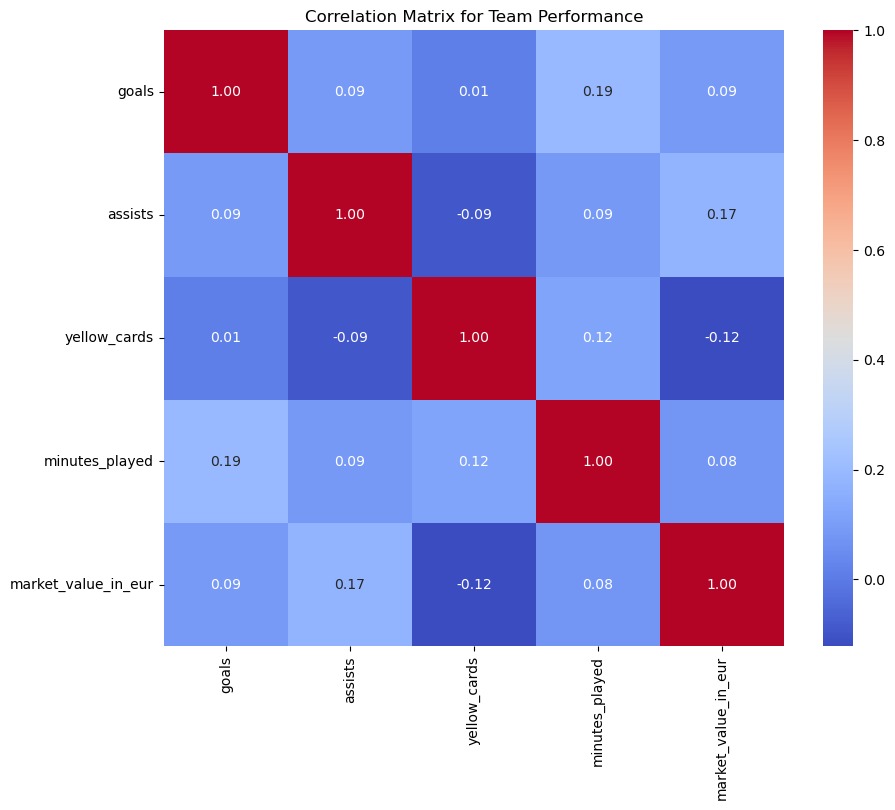

,goals,assists,yellow_cards,minutes_played,market_value_in_eur
goals,1.000000,0.089989,0.013522,0.194889,0.091787
assists,0.089989,1.000000,-0.092310,0.086878,0.173245
yellow_cards,0.013522,-0.092310,1.000000,0.123340,-0.121567
minutes_played,0.194889,0.086878,0.123340,1.000000,0.077168
market_value_in_eur,0.091787,0.173245,-0.121567,0.077168,1.000000


In [51]:
### 3. Key Factors Influencing Team Performance

def analyze_team_performance():
    """
    Identify key factors influencing team performance using correlations.
    """
    # Define relevant columns for team performance analysis
    performance_factors = ['goals', 'assists', 'yellow_cards',  'minutes_played', 'market_value_in_eur']
    
    # Correlation matrix
    correlation_matrix = df[performance_factors].corr()
    print("\nCorrelation Matrix for Team Performance:")
    print(correlation_matrix)
    
   
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix for Team Performance")
    plt.show()
    return correlation_matrix
# Example usage
analyze_team_performance()


#### goals and assists: A weak positive correlation (0.09), suggesting only a slight relationship between goals and assists.
##### goals and minutes_played: Positive correlation (0.19), indicating players who play more minutes tend to score more goals.
##### yellow_cards and market_value_in_eur: Slight negative correlation (-0.12), suggesting higher-value players tend to receive fewer yellow cards.
##### assists and market_value_in_eur: Weak positive correlation (0.17), suggesting that higher-valued players tend to contribute slightly moreassists.
##### yellow_cards and assists: Slight negative correlation (-0.09), suggesting that players who assist more often tend to receive fewer yellow cards.

In [53]:
### 1. Sampling Technique

def get_random_sample(data, sample_size=30):
    """
    Get a random sample of a specified size from the data.
    """
    sample = data.sample(n=sample_size, random_state=42)
    return sample

# Example usage
sample = get_random_sample(df['goals'], sample_size=50)
print("Random Sample:")
print(sample)

Random Sample:
1741    1
3250    0
3639    0
3335    0
298     0
1864    0
1621    0
351     1
1210    0
2409    0
1029    1
2318    0
3665    0
3125    1
4077    1
3297    1
3592    0
497     0
2123    1
734     0
1152    0
1047    1
1032    1
3603    1
2459    0
3933    0
1626    0
1088    1
599     0
2258    0
296     0
2475    0
1593    0
314     0
838     1
1146    0
794     1
1018    1
3834    0
751     0
4103    1
2685    1
811     0
96      0
2605    0
175     1
2338    0
2458    1
3154    0
761     0
Name: goals, dtype: int64


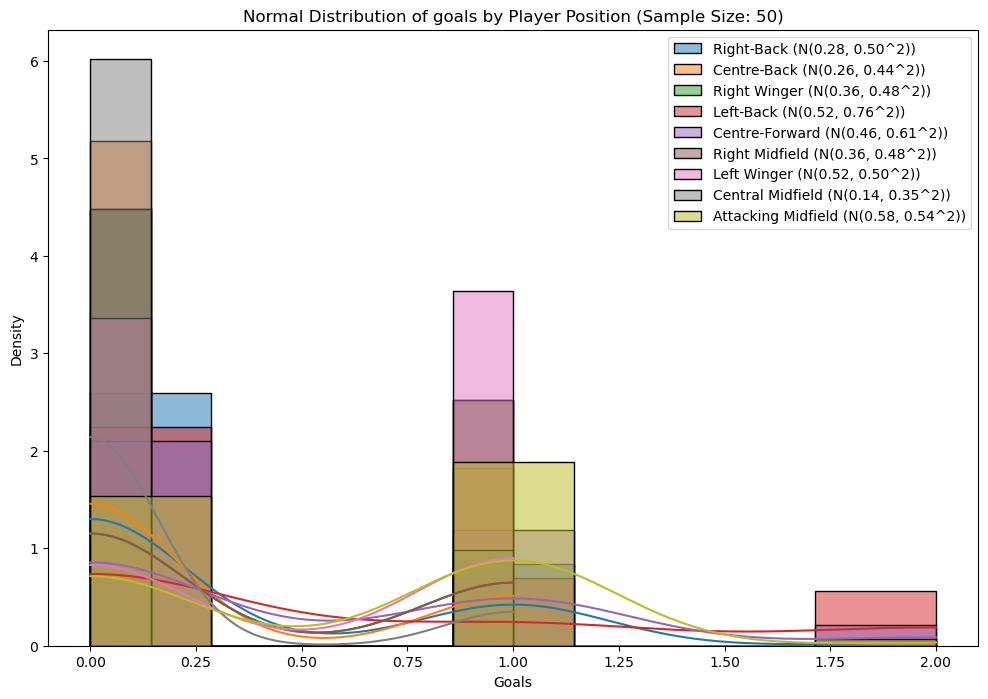

In [54]:
# 2. How does a player's performance in different positions impact their overall performance metrics?
def performance_by_position_normal_distribution(metric="goals", sample_size=50):
    """
    Analyze the impact of player positions on performance metrics using sampling and normal distribution.
    """
    positions = df["position_x"].dropna().unique()
    plt.figure(figsize=(12, 8))
    
    for position in positions:
        position_data = df[df["position_x"] == position][metric].dropna()
        if len(position_data) >= sample_size:
            sample = position_data.sample(n=sample_size, random_state=42)
            mu, sigma = sample.mean(), sample.std()
            sns.histplot(sample, kde=True, label=f"{position} (N({mu:.2f}, {sigma:.2f}^2))", stat="density", alpha=0.5)
    
    plt.title(f"Normal Distribution of {metric} by Player Position (Sample Size: {sample_size})")
    plt.xlabel(metric.capitalize())
    plt.ylabel("Density")
    plt.legend()
    plt.show()

 
performance_by_position_normal_distribution("goals", sample_size=50)

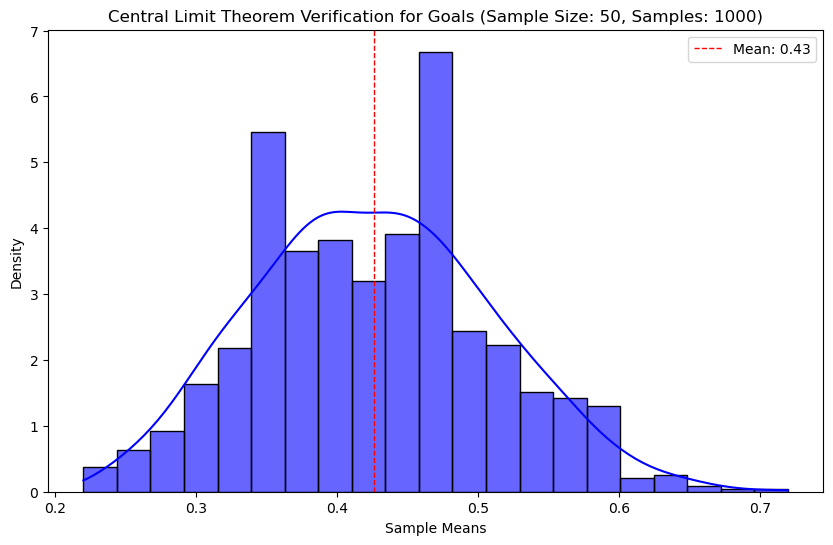

In [55]:

    
    
  

# Function to verify the Central Limit Theorem for player performance metrics
def verify_central_limit_theorem(df, metric="goals", sample_size=50, num_samples=1000):
    """
    Verify the Central Limit Theorem by taking multiple samples of player performance metrics and plotting their means.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing match and player data.
    - metric (str): The performance metric to analyze (default is "goals").
    - sample_size (int): The size of each sample (default is 50).
    - num_samples (int): The number of samples to draw (default is 1000).
    """
    means = []
    
    # Drop NaN values for the selected metric
    data = df[metric].dropna()
    
    # Ensure there is enough data to draw the specified number of samples
    if len(data) < sample_size:
        print("Not enough data to perform sampling.")
        return
    
    # Draw multiple samples and calculate their means
    for _ in range(num_samples):
        sample = data.sample(n=sample_size, replace=True)
        means.append(sample.mean())
    
    # Plot the distribution of the sample means
    plt.figure(figsize=(10, 6))
    sns.histplot(means, kde=True, stat="density", color="blue", alpha=0.6)
    plt.title(f"Central Limit Theorem Verification for {metric.capitalize()} (Sample Size: {sample_size}, Samples: {num_samples})")
    plt.xlabel("Sample Means")
    plt.ylabel("Density")
    plt.axvline(np.mean(means), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {np.mean(means):.2f}")
    plt.legend()
    plt.show()

# Example usage
# performance_by_position_normal_distribution(df, metric="goals", sample_size=50)
verify_central_limit_theorem(df, metric="goals", sample_size=50, num_samples=1000)


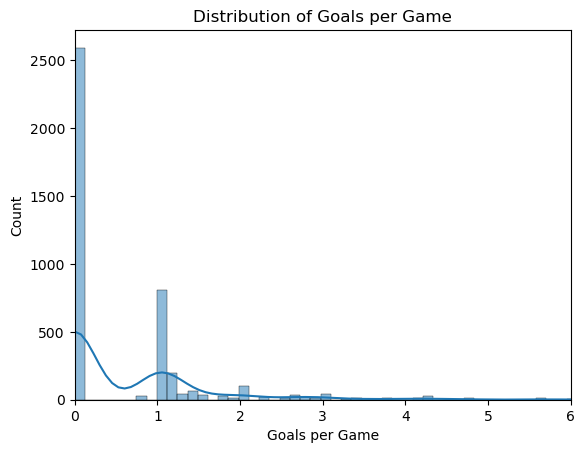

          player_name_y  goals
3221  Christian Pulisic      3
3227  Christian Pulisic      3
3198  Christian Pulisic      3
3197  Christian Pulisic      3
3196  Christian Pulisic      3
3195  Christian Pulisic      3
3194  Christian Pulisic      3
3223  Christian Pulisic      3
3224  Christian Pulisic      3
3226  Christian Pulisic      3


In [56]:
# Calculate goals per game for each player
df['goals_per_game'] = df['goals'] / df['minutes_played'] * 90

# Visualize the distribution of goals per game
sns.histplot(df['goals_per_game'], kde=True)
plt.xlabel('Goals per Game')
plt.ylabel('Count')
plt.title('Distribution of Goals per Game')
plt.xlim(0, 6)  # Set x-axis range to [0, 6]
plt.show()

# Identify top-performing players
top_scorers = df.sort_values(by='goals', ascending=False).head(10)
print(top_scorers[['player_name_y', 'goals']])

#  logistic regression for yellow card

In [58]:

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [59]:
df_log=df[['height_in_cm', 'minutes_played', 'position_x',  'attendance']]
df_log

,height_in_cm,minutes_played,position_x,attendance
0,186.0,70,Right-Back,45033.0
1,186.0,70,Right-Back,45033.0
2,186.0,70,Right-Back,45033.0
3,186.0,70,Right-Back,45033.0
4,186.0,70,Right-Back,45033.0
...,...,...,...,...
4194,176.0,77,Centre-Forward,3200.0
4195,176.0,77,Centre-Forward,3200.0
4196,176.0,77,Centre-Forward,3200.0
4197,176.0,77,Centre-Forward,3200.0


In [60]:
df['yellow_cards'].value_counts()

yellow_cards
0    3527
1     672
Name: count, dtype: int64

In [61]:
label=preprocessing.LabelEncoder()
df_log['position_x_enc']=label.fit_transform(df_log['position_x'])
df_log['position_x_enc'].unique()


array([9, 2, 4, 8, 6, 3, 7, 5, 1, 0])

In [62]:
df_log.drop(columns=['position_x'],inplace=True)
df_log

,height_in_cm,minutes_played,attendance,position_x_enc
0,186.0,70,45033.0,9
1,186.0,70,45033.0,9
2,186.0,70,45033.0,9
3,186.0,70,45033.0,9
4,186.0,70,45033.0,9
...,...,...,...,...
4194,176.0,77,3200.0,3
4195,176.0,77,3200.0,3
4196,176.0,77,3200.0,3
4197,176.0,77,3200.0,3


([0, 1, 2, 3],
 [Text(0, 0, 'height_in_cm'),
  Text(1, 0, 'minutes_played'),
  Text(2, 0, 'attendance'),
  Text(3, 0, 'position_x_enc')])

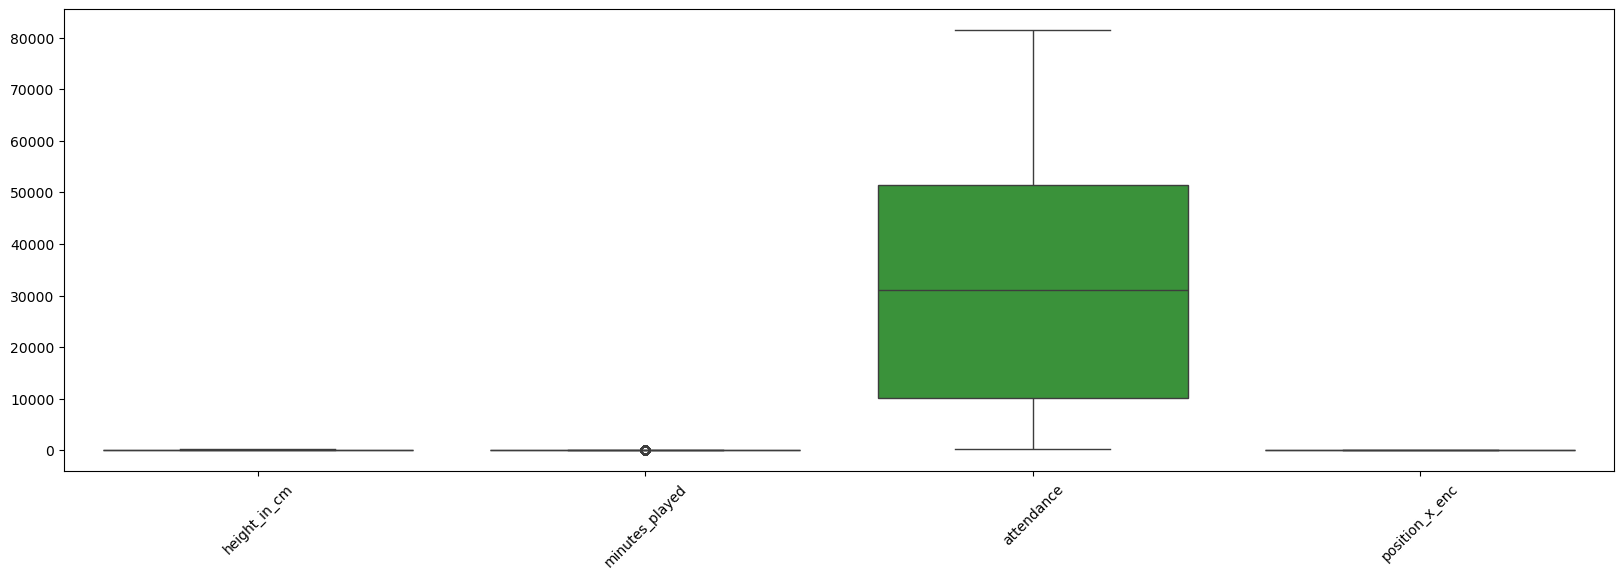

In [63]:
sns.boxplot(data=df_log)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

In [64]:
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df_new = pd.DataFrame(df_log)

# Perform outlier treatment on all columns
log_treated_df = iqr_winsorization(df_new.copy())
log_treated_df

,height_in_cm,minutes_played,attendance,position_x_enc
0,186.0,70.0,45033.0,9.0
1,186.0,70.0,45033.0,9.0
2,186.0,70.0,45033.0,9.0
3,186.0,70.0,45033.0,9.0
4,186.0,70.0,45033.0,9.0
...,...,...,...,...
4194,176.0,77.0,3200.0,3.0
4195,176.0,77.0,3200.0,3.0
4196,176.0,77.0,3200.0,3.0
4197,176.0,77.0,3200.0,3.0


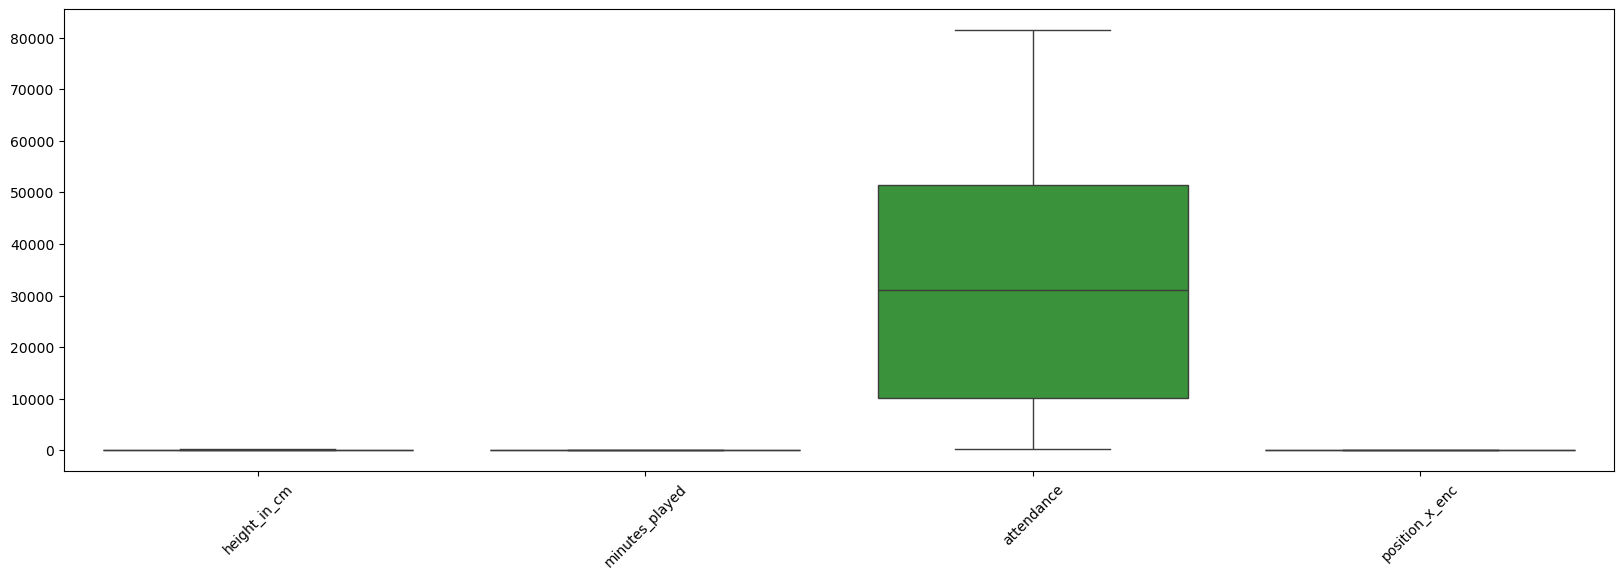

In [65]:
sns.boxplot(data=log_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [66]:
col=log_treated_df.columns
scaler=StandardScaler()
log_treated_df=scaler.fit_transform(log_treated_df)
log_df_scaled = pd.DataFrame(log_treated_df, columns=col)
log_df_scaled

,height_in_cm,minutes_played,attendance,position_x_enc
0,0.650517,0.004798,0.483979,1.152828
1,0.650517,0.004798,0.483979,1.152828
2,0.650517,0.004798,0.483979,1.152828
3,0.650517,0.004798,0.483979,1.152828
4,0.650517,0.004798,0.483979,1.152828
...,...,...,...,...
4194,-0.907236,0.319208,-1.205150,-0.966424
4195,-0.907236,0.319208,-1.205150,-0.966424
4196,-0.907236,0.319208,-1.205150,-0.966424
4197,-0.907236,0.319208,-1.205150,-0.966424


##### multicollinearity

In [68]:
# Selecting the cutoff value as 0.7
abs(log_df_scaled.corr())>=0.7 # ignored the dependent column for scaling

,height_in_cm,minutes_played,attendance,position_x_enc
height_in_cm,True,False,False,False
minutes_played,False,True,False,False
attendance,False,False,True,False
position_x_enc,False,False,False,True


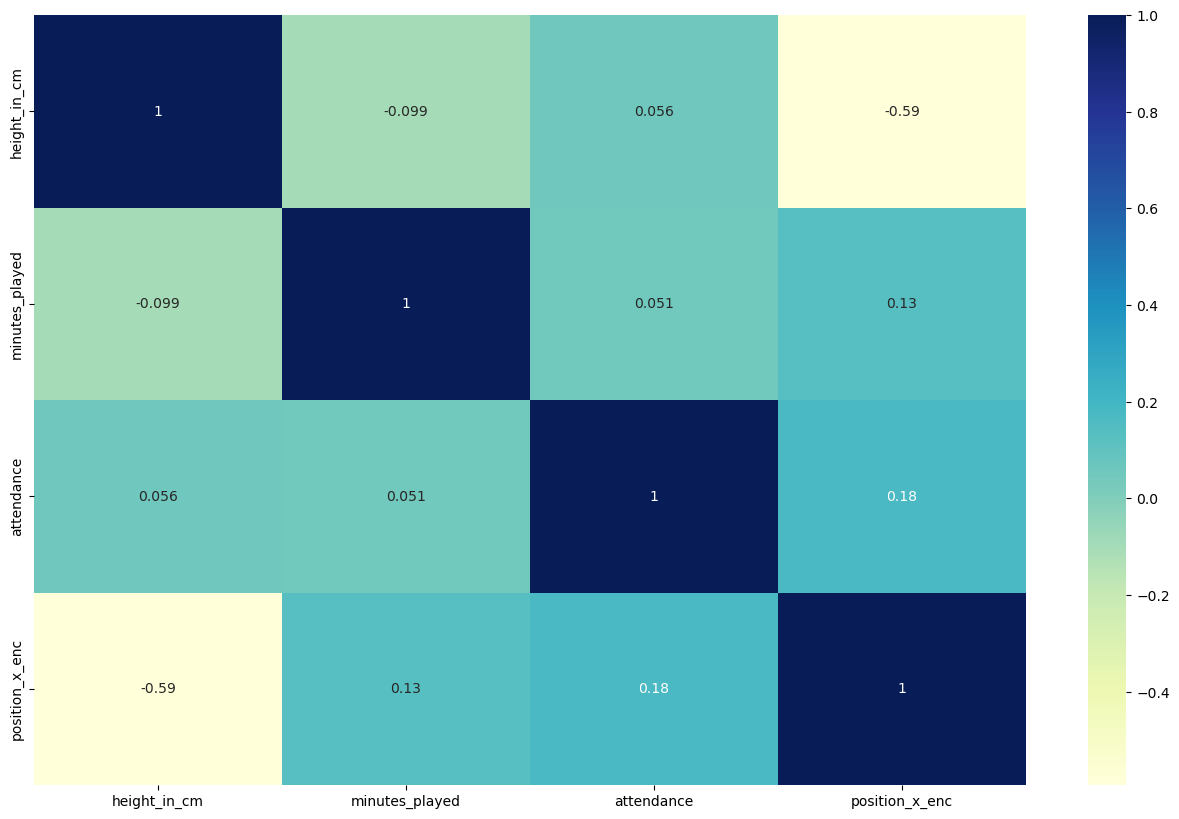

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax = sns.heatmap(log_df_scaled.corr(), annot=True, cmap="YlGnBu")

In [70]:
# Drop 'height_in_cm' due to correlation with 'position_x_enc'
df.drop(['height_in_cm'], axis=1, inplace=True)

In [71]:
### 1. Preparation of training and test datasets

In [72]:
X = log_df_scaled
y = df['yellow_cards']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3359, 4), (840, 4), (3359,), (840,))

In [74]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:
### Predicting Data

In [76]:
Y_pred = logreg.predict(X_test)

In [77]:
### Model Evaluation

In [78]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,Y_pred))

tn, fp, fn, tp = confusion_matrix(y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[700   0]
 [140   0]]
700 0 140 0


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, Y_pred))
print('recall:', recall_score(y_test, Y_pred))
print('f1-score:', f1_score(y_test, Y_pred))
print('precision:', precision_score(y_test, Y_pred))

accuracy: 0.8333333333333334
recall: 0.0
f1-score: 0.0
precision: 0.0


In [80]:
# roc_curve

In [81]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

0.681969387755102

<Figure size 1000x800 with 0 Axes>

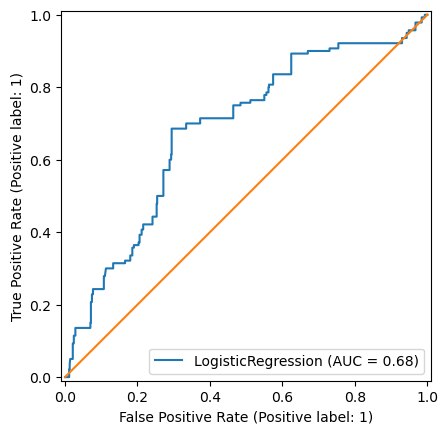

In [82]:
# ROC curve
#from sklearn.metrics import plot_roc_curve 
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

""""Final Interpretation:
Overall Performance:
Accuracy: A reasonable accuracy value (if obtained) indicates the model's ability to predict the occurrence of yellow cards correctly. However, accuracy can be misleading if the dataset is imbalanced (e.g., significantly fewer instances of yellow cards than non-yellow cards).
Performance Metrics:
Recall (for yellow cards): Focus on recall because we want the model to correctly identify players likely to receive yellow cards. Missing potential yellow cards could lead to strategic errors in decisions like player substitutions.

Precision: Precision helps assess how many of the predicted yellow card instances were correct. A high precision ensures fewer false positives (players flagged for yellow cards incorrectly).

F1-score: This metric combines precision and recall, making it an essential metric to evaluate the model's balance in identifying yellow cards effectively.

Model Insights:
Feature Importance:

minutes_played: Higher minutes likely correlate with more opportunities to commit fouls, potentially leading to yellow cards.
position_x_enc: Players in defensive positions (e.g., defenders or defensive midfielders) might have a higher propensity for yellow cards due to frequent tackles or fouls.
attendance: High attendance may indirectly influence player behavior and referee decisions (home crowd pressure or intensity of the game).
height_in_cm: Taller players might be involved in aerial duels, potentially increasing the risk of fouls and yellow cards.
Data Imbalance: If the dataset contains a small percentage of yellow card instances, the model might perform poorly on this minority class. Address this imbalance with techniques like oversampling (e.g., SMOTE), undersampling, or class weighting in the model.

ROC-AUC Performance: The ROC-AUC score would measure how well the model distinguishes between players who do and do not receive yellow cards. A score close to 1 indicates excellent performance, while a score near 0.5 suggests the model is no better than random guessing.''''



'''Final Interpretation:
Overall Performance:
Accuracy (0.658): The model has a moderate overall accuracy, correctly predicting 65.8% of cases. However, accuracy alone is insufficient to evaluate the performance, especially in scenarios where there may be imbalanced data or the cost of misclassification is high.
Performance Metrics for the Target Variable (attendance):
Recall (0.189):
The recall is relatively low, indicating the model identifies only 18.9% of the true positive cases (correctly identifying the given attendance class). This suggests the model may struggle to detect attendance patterns effectively.

Precision (0.820):
Precision is high at 82%, meaning the model's predictions for a specific class (e.g., high attendance) are mostly correct. However, the combination of high precision and low recall indicates that the model is overly conservative, likely missing many true cases to achieve its precision.

F1-score (0.308):
The F1-score, which balances precision and recall, is 30.8%, indicating that the trade-off between the two metrics is skewed, with the model favoring precision at the expense of recall.

ROC Score (0.625):
The ROC score, slightly above random guessing (0.5), suggests that the model has a limited ability to distinguish between different attendance levels based on the independent variables.

Key Takeaways:
Low Recall:
A recall of 0.189 highlights the model's inability to capture the majority of attendance patterns accurately. This is particularly concerning if predicting attendance levels accurately is a critical goal.

High Precision but Limited Generalization:
While the model has a good precision score, the low recall implies that the model may not generalize well to unseen data, focusing on being correct when predicting but missing many true cases.

Moderate ROC Score:
With an ROC score of 0.625, the model's performance is only slightly better than random guessing, indicating room for significant improvement.''''



# player profile for market value

##### Market Value by Player Position

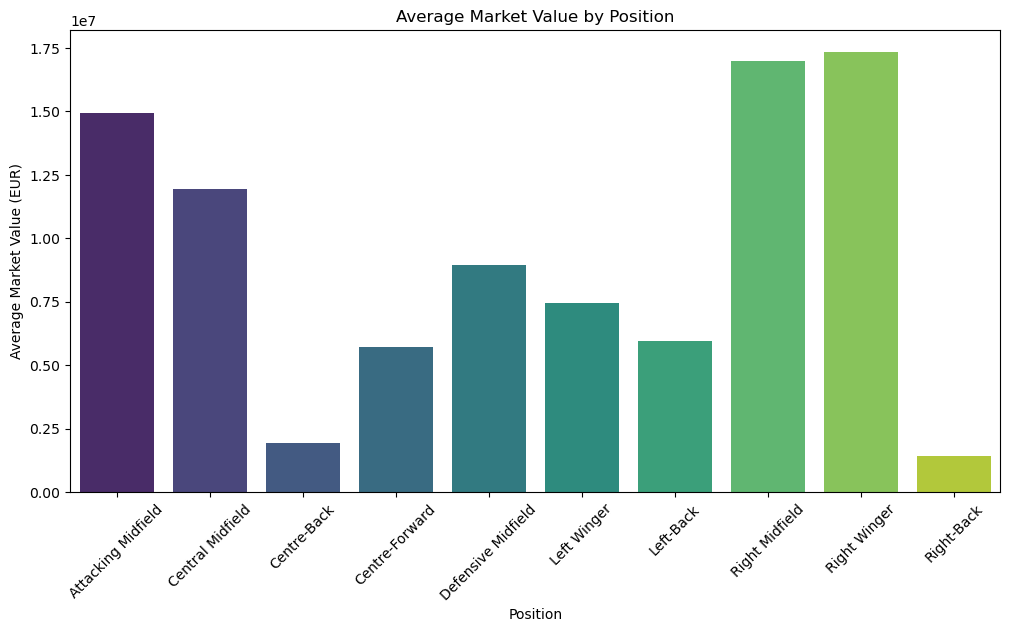

In [87]:
# Plot market value distribution by position using a bar graph
plt.figure(figsize=(12, 6))
avg_market_value = df.groupby('position_x')['market_value_in_eur'].mean().reset_index()
sns.barplot(data=avg_market_value, x='position_x', y='market_value_in_eur', palette='viridis')
plt.title('Average Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()


In [88]:
#### right finger is the top most position

##### average market value by countries

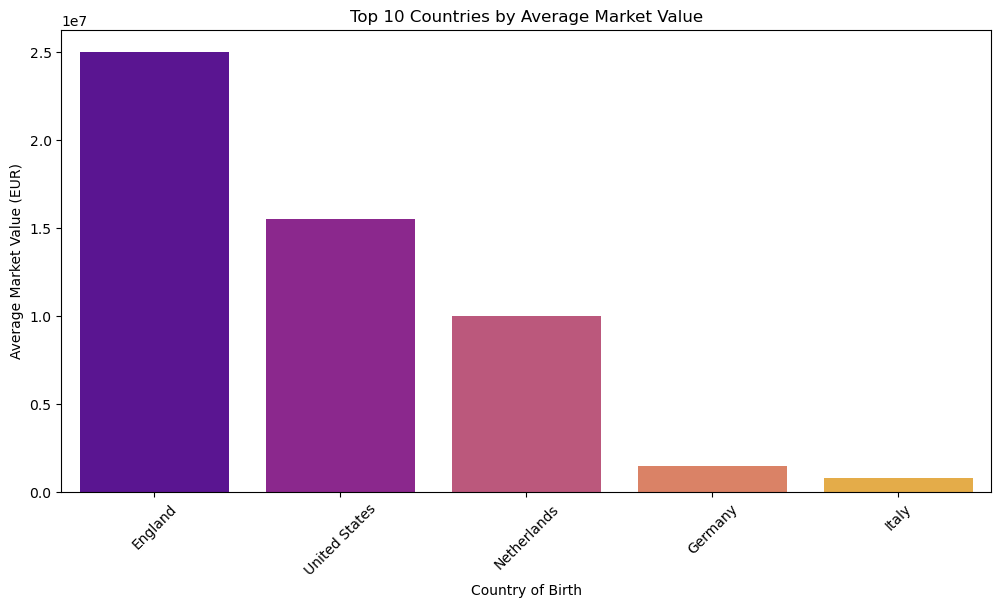

In [90]:
# Bar plot of average market value by country of birth
plt.figure(figsize=(12, 6))
avg_market_value_by_country = df.groupby('country_of_birth')['market_value_in_eur'].mean().nlargest(10).reset_index()
sns.barplot(data=avg_market_value_by_country, x='country_of_birth', y='market_value_in_eur', palette='plasma')
plt.title('Top 10 Countries by Average Market Value')
plt.xlabel('Country of Birth')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()



In [91]:
#### england is the top most country 

##### Clubs with the Highest Market Value Players

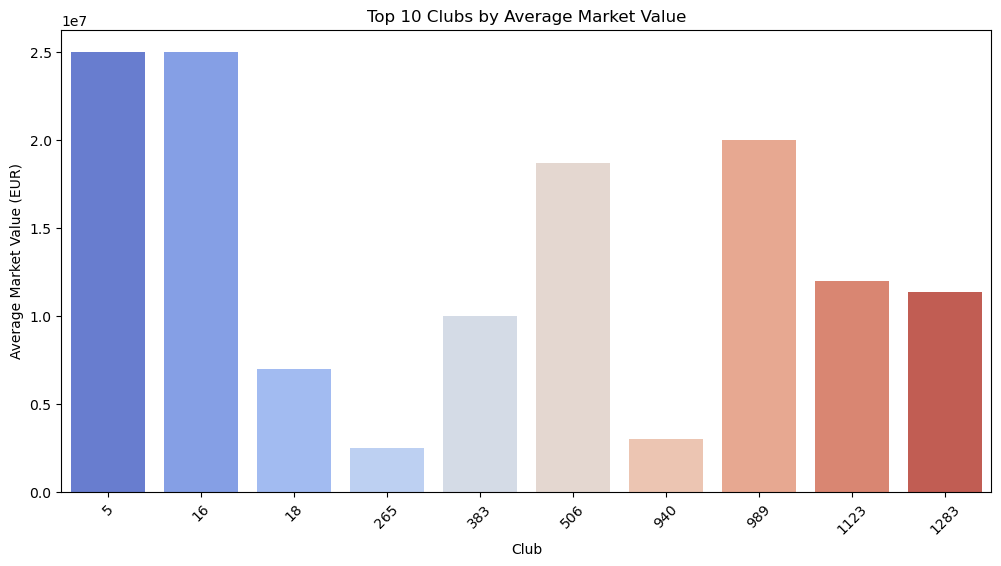

In [93]:
# Top 10 clubs by average market value
top_clubs = df.groupby('current_club_id')['market_value_in_eur'].mean().nlargest(10).reset_index()

# Bar plot of top clubs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clubs, x='current_club_id', y='market_value_in_eur', palette='coolwarm')
plt.title('Top 10 Clubs by Average Market Value')
plt.xlabel('Club')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_id                    4199 non-null   int64         
 3   competition_id_x             4199 non-null   object        
 4   yellow_cards                 4199 non-null   int64         
 5   red_cards                    4199 non-null   int64         
 6   goals                        4199 non-null   int64         
 7   assists                      4199 non-null   int64         
 8   minutes_played               4199 non-null   int64         
 9   season                       4199 non-null   int64         
 10  round                        4199 non-null   object        
 11  home_club_goals              4199 non-null 

#  Linear regression for  market_value_in_eur

In [96]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game'],
      dtype='object')

In [97]:


# Assuming your DataFrame is named 'df'
correlations = df.corr(numeric_only=True)

# Display correlations with 'market_value_in_eur'
market_value_corr = correlations['market_value_in_eur'].sort_values(ascending=False)

# Print the correlations
print(market_value_corr)


market_value_in_eur            1.000000
highest_market_value_in_eur    0.941945
attendance                     0.547056
last_season                    0.224367
assists                        0.173245
season                         0.162868
away_club_goals                0.153309
game_id_x                      0.146454
player_id                      0.141412
minute                         0.113560
goals                          0.091787
minutes_played                 0.077168
home_club_goals                0.059287
goals_per_game                 0.051671
team_captain                  -0.098893
yellow_cards                  -0.121567
number                        -0.290891
current_club_id               -0.438278
red_cards                           NaN
Name: market_value_in_eur, dtype: float64


In [98]:
df_simple=df[['highest_market_value_in_eur', 'attendance',  'away_club_goals','player_id']]
df_simple.head()

,highest_market_value_in_eur,attendance,away_club_goals,player_id
0,5000000.0,45033.0,2,49723
1,5000000.0,45033.0,2,49723
2,5000000.0,45033.0,2,49723
3,5000000.0,45033.0,2,49723
4,5000000.0,45033.0,2,49723


In [99]:
df_simple['away_club_goals'].value_counts()

away_club_goals
1    1377
0    1073
2     879
3     393
4     284
5     108
6      43
7      42
Name: count, dtype: int64

In [100]:
df_simple['away_club_goals_scored'] = (df_simple['away_club_goals'] > 0).astype(int)
print(df_simple['away_club_goals_scored'].value_counts())

away_club_goals_scored
1    3126
0    1073
Name: count, dtype: int64


In [101]:
df_simple.drop(columns=['away_club_goals'],inplace=True)
df_simple

,highest_market_value_in_eur,attendance,player_id,away_club_goals_scored
0,5000000.0,45033.0,49723,1
1,5000000.0,45033.0,49723,1
2,5000000.0,45033.0,49723,1
3,5000000.0,45033.0,49723,1
4,5000000.0,45033.0,49723,1
...,...,...,...,...
4194,600000.0,3200.0,537467,1
4195,600000.0,3200.0,537467,1
4196,600000.0,3200.0,537467,1
4197,600000.0,3200.0,537467,1


In [102]:
### outlier treatment

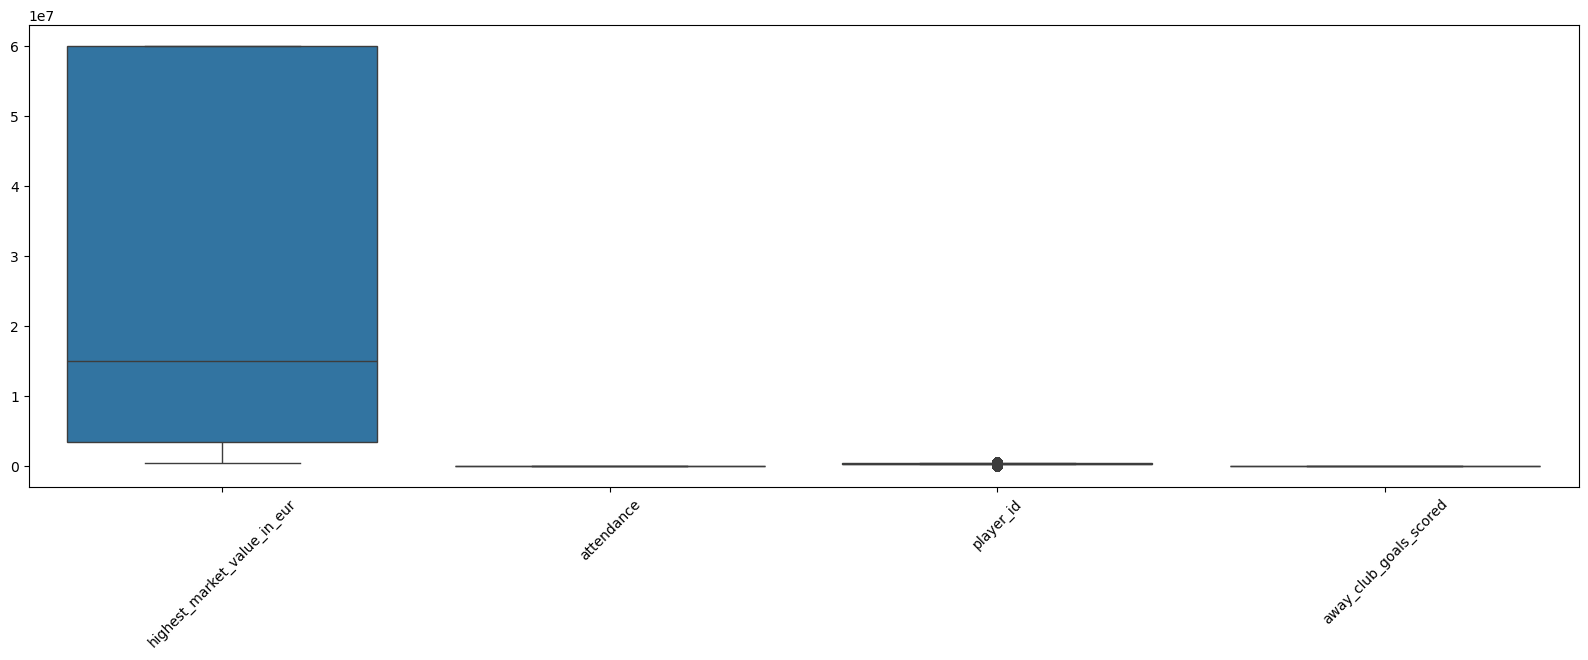

In [103]:
sns.boxplot(data=df_simple)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [104]:
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df_win = pd.DataFrame(df_simple)
# Perform outlier treatment on all columns
treated_df = iqr_winsorization(df_win.copy())
treated_df

,highest_market_value_in_eur,attendance,player_id,away_club_goals_scored
0,5000000.0,45033.0,213183.5,1.0
1,5000000.0,45033.0,213183.5,1.0
2,5000000.0,45033.0,213183.5,1.0
3,5000000.0,45033.0,213183.5,1.0
4,5000000.0,45033.0,213183.5,1.0
...,...,...,...,...
4194,600000.0,3200.0,465443.5,1.0
4195,600000.0,3200.0,465443.5,1.0
4196,600000.0,3200.0,465443.5,1.0
4197,600000.0,3200.0,465443.5,1.0


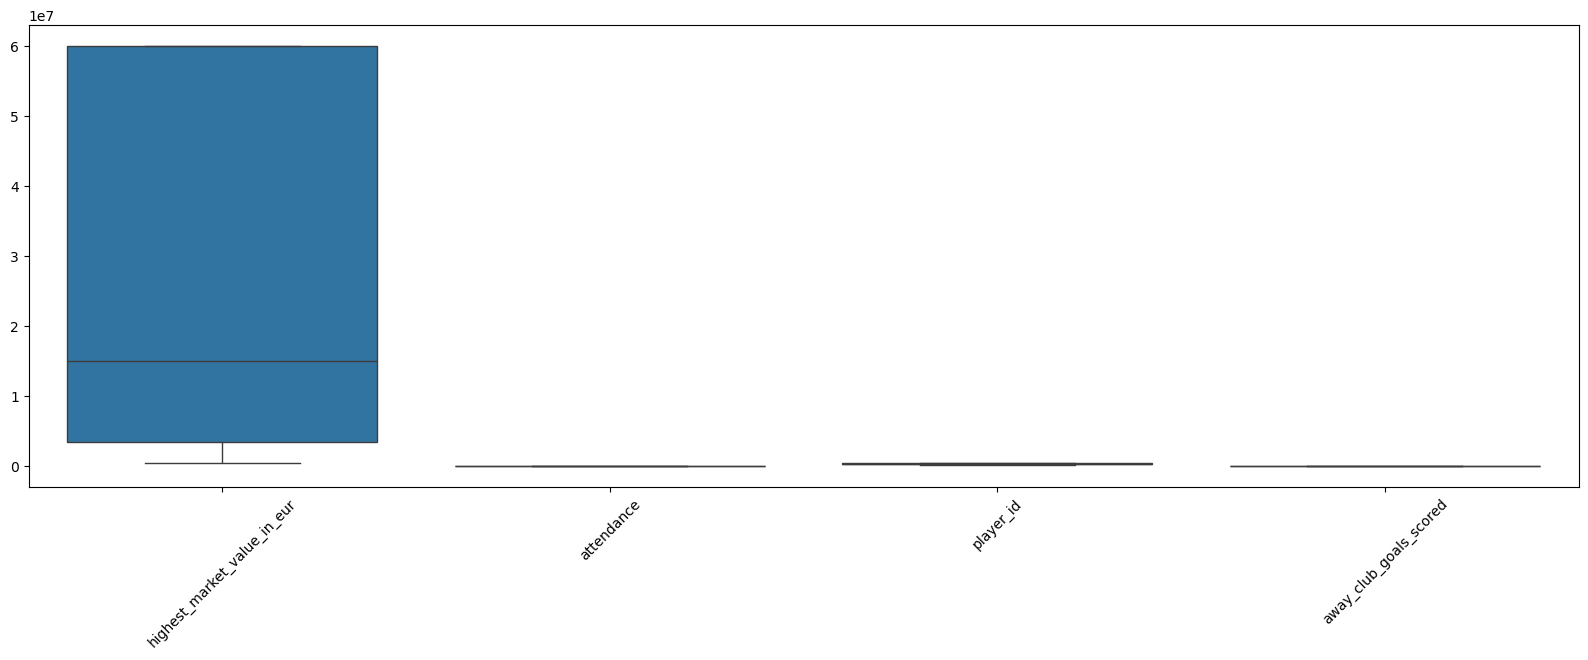

In [105]:
sns.boxplot(data=treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [106]:
### Scaling

In [107]:
col=treated_df.columns
scaler=StandardScaler()
simple_treated_df=scaler.fit_transform(treated_df)
simple_df_scaled = pd.DataFrame(simple_treated_df, columns=col)
simple_df_scaled

,highest_market_value_in_eur,attendance,player_id,away_club_goals_scored
0,-0.824680,0.483979,-1.430417,0.585876
1,-0.824680,0.483979,-1.430417,0.585876
2,-0.824680,0.483979,-1.430417,0.585876
3,-0.824680,0.483979,-1.430417,0.585876
4,-0.824680,0.483979,-1.430417,0.585876
...,...,...,...,...
4194,-1.004996,-1.205150,1.829756,0.585876
4195,-1.004996,-1.205150,1.829756,0.585876
4196,-1.004996,-1.205150,1.829756,0.585876
4197,-1.004996,-1.205150,1.829756,0.585876


In [108]:
simple_df_scaled.columns

Index(['highest_market_value_in_eur', 'attendance', 'player_id',
       'away_club_goals_scored'],
      dtype='object')

### Extract out the new data from the origial data after scalling, which will be used for prediction

In [110]:
# Extract the last row index
last_row_index = len(simple_df_scaled) - 1  # Get the length (number of rows) and subtract 1 for last index

# Extract the last row using iloc and store in a new DataFrame
new_data = simple_df_scaled.iloc[last_row_index]  # Select row using index

# Reshape the extracted Series into a DataFrame (optional)
new_data_df = new_data.to_frame().transpose()  # Convert Series to single-row DataFrame

In [111]:
simple_df_scaled = simple_df_scaled.iloc[:-1]  #Slicing with exclusive upper bound 

In [112]:
### 3. Feature Selection
### Pearson correlation coefficient: To find the correlation between different variables in data
#### Positive Correlation: If variable A increases, then variable B also increases and vice-versa.
#### Negative Correlation: If variable A increases, then variable B decreases and vice-versa.
#### Zero value means no correlation

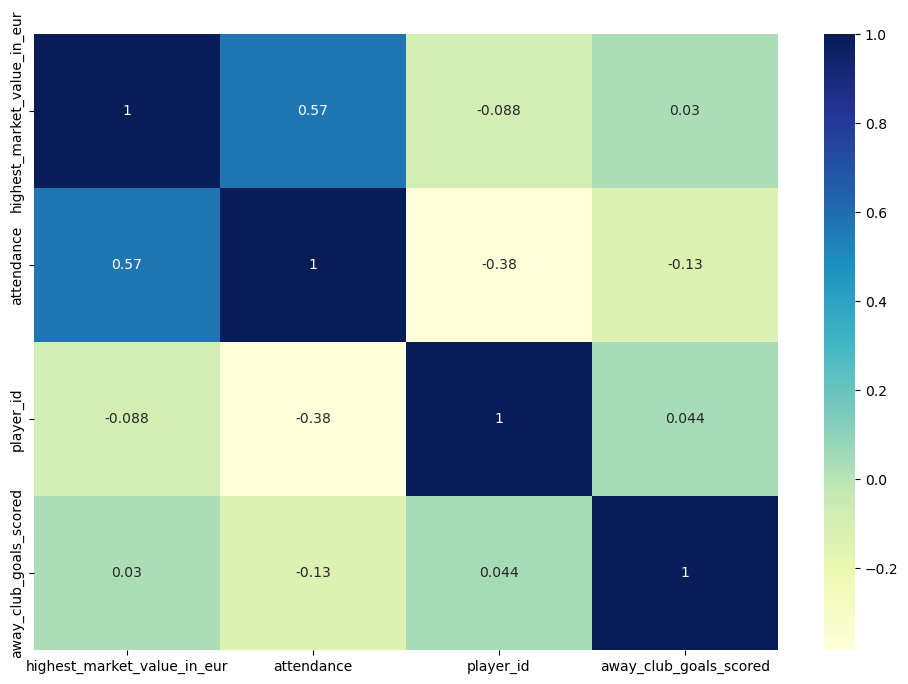

In [113]:
# Plotting heatmap

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(simple_df_scaled.corr(), annot=True, cmap="YlGnBu")

In [114]:

simple_df_scaled.columns

Index(['highest_market_value_in_eur', 'attendance', 'player_id',
       'away_club_goals_scored'],
      dtype='object')

In [115]:
# To show the correlation values from most negatively correlated to the most positively correlated.
simple_df_scaled.corr()[['highest_market_value_in_eur']].sort_values('highest_market_value_in_eur')

,highest_market_value_in_eur
player_id,-0.087958
away_club_goals_scored,0.029943
attendance,0.568217
highest_market_value_in_eur,1.000000


In [116]:
simple_df_scaled

,highest_market_value_in_eur,attendance,player_id,away_club_goals_scored
0,-0.824680,0.483979,-1.430417,0.585876
1,-0.824680,0.483979,-1.430417,0.585876
2,-0.824680,0.483979,-1.430417,0.585876
3,-0.824680,0.483979,-1.430417,0.585876
4,-0.824680,0.483979,-1.430417,0.585876
...,...,...,...,...
4193,-1.004996,-1.205150,1.829756,0.585876
4194,-1.004996,-1.205150,1.829756,0.585876
4195,-1.004996,-1.205150,1.829756,0.585876
4196,-1.004996,-1.205150,1.829756,0.585876


In [117]:
simple_df_scaled.columns

Index(['highest_market_value_in_eur', 'attendance', 'player_id',
       'away_club_goals_scored'],
      dtype='object')

In [118]:
columns_to_drop = ['away_club_goals_scored','player_id']
#df_scaled_selected = simple_df_scaled.drop(columns_to_drop, axis=1)

#df_scaled_selected.head()

In [119]:
#### Splitting data

In [120]:
#https://saturncloud.io/blog/understanding-the-differences-between-numpy-reshape1-1-and-reshape1-1/#:~:text=When%20you%20use%20reshape(%2D,elements%20in%20your%20original%20array.

X_gr=np.array(simple_df_scaled['highest_market_value_in_eur']).reshape((-1, 1))
y=np.array(simple_df_scaled['attendance'])
X_train_gr,X_test_gr,y_train,y_test=train_test_split(X_gr,y,test_size=0.3,random_state=200)

In [121]:
##### Calculation of a and b for full data

In [122]:
s_model = LinearRegression().fit(X_train_gr, y_train)
s_r_sq=s_model.score(X_train_gr, y_train)

In [123]:
s_r_sq




0.31815895976219

In [124]:
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

intercept: 0.0048819702354920905
slope: [0.56427143]


In [125]:
### Predict the model

In [126]:
y_pred_gr = s_model.predict(X_test_gr)
print('predicted response:', y_pred_gr, sep='\n')

predicted response:
[-0.5622087  -0.46046136 -0.22921742 ...  0.81138034  0.1176485
 -0.55295894]


In [127]:
### Evaluating the model performance

In [128]:
MSE=mean_squared_error(y_test, y_pred_gr)
MAE=mean_absolute_error(y_test,y_pred_gr)
RMSE = mean_squared_error(y_test, y_pred_gr, squared=False)
print(MSE, MAE, RMSE)

0.6580059535008643 0.7026633489911682 0.8111756613094752


In [129]:
# R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_gr)
print(f"The R2 score of the model is", r2)

The R2 score of the model is 0.33298945196513274


In [130]:
# Reshape the new data into a 2D array for prediction
new_data_array = np.reshape(new_data_df[['attendance']], (1, -1))

In [131]:
# Predict the target value for the new data
predicted_value = s_model.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value[0])

Predicted value for the new data: -0.6751499900981561


In [132]:
# Predict the target value for the new data
predicted_value = s_model.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value[0])

Predicted value for the new data: -0.6751499900981561


In [133]:
# Original value of the new data
new_data_df['highest_market_value_in_eur']

4198   -1.004996
Name: highest_market_value_in_eur, dtype: float64

In [134]:
### Checking for Linear Relationship

In [136]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


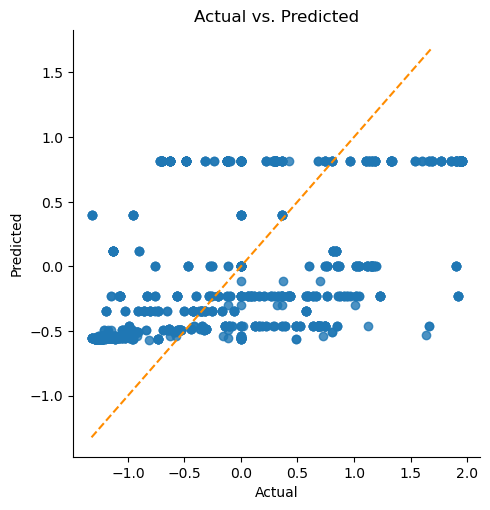

In [137]:
linear_assumption(s_model, X_test_gr, y_test)

In [138]:
###  Checking Homoscedasticity: Plot the residuals of linear regression
#Homoscedasticity: Residuals have equal or almost equal variance across the regression line. There should not be any pattern in the error terms. It can be checked by plotting the error terms with predicted terms.

In [139]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


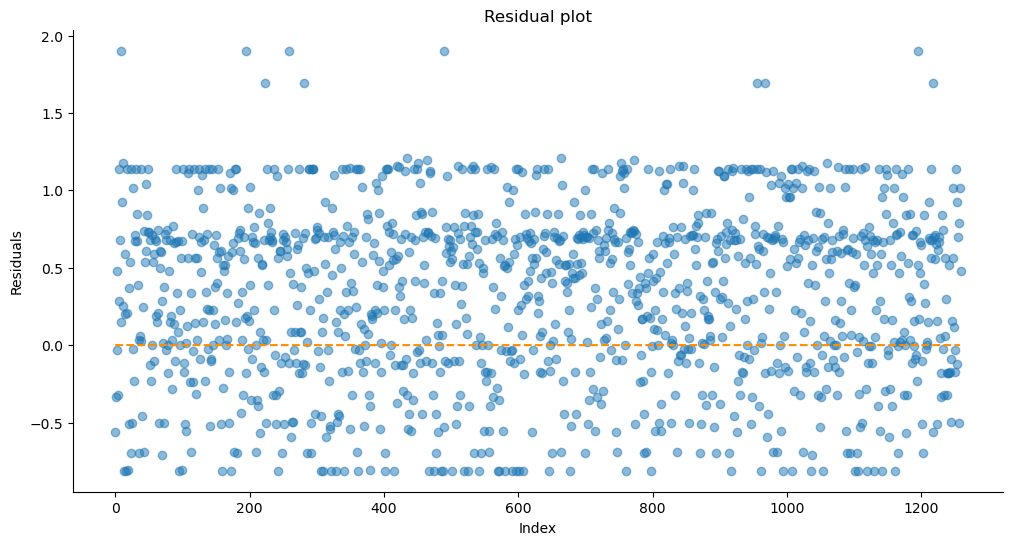

In [140]:
homoscedasticity_assumption(s_model, X_test_gr, y_test)

In [141]:
### Error Normality curve

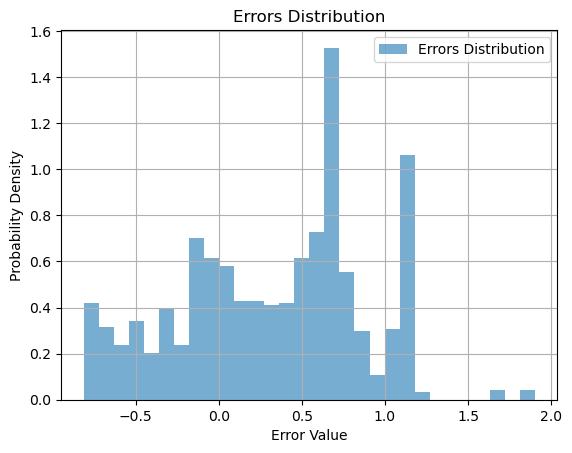

In [142]:
df_results = calculate_residuals(s_model, X_test_gr, y_test)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
### Plot for data with Regression Line

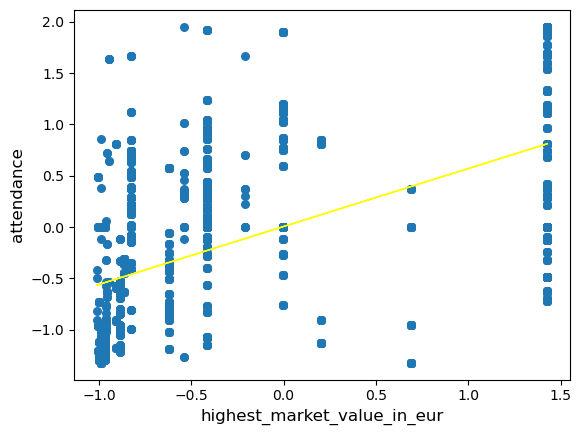

In [144]:
X_test_flat = X_test_gr.flatten()

fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
#plt.ylim((0,4))
#weather_df_test=X_test

simple_df_scaled.plot.scatter(x = 'highest_market_value_in_eur', y = 'attendance', s = 30, ax=ax)
plt.plot(X_test_flat, y_pred_gr, color="yellow", linewidth=1)
plt.show()

''''
Moderate Error:
MSE (Mean Squared Error) = 0.658:
The MSE of 0.658 indicates the average squared difference between predicted and actual temperatures. While this isn't extremely high, it suggests that the model has moderate error. Because MSE amplifies larger deviations due to squaring, even moderate inaccuracies in prediction contribute noticeably to this value.

MAE (Mean Absolute Error) = 0.703:
The MAE of 0.703 means that, on average, the predicted temperatures deviate from the actual temperatures by approximately 0.70 degrees. Compared to the earlier score of 0.573, this suggests that the model's accuracy has slightly decreased.

RMSE (Root Mean Squared Error) = 0.811:
The RMSE of 0.811 is the square root of the MSE and represents the average magnitude of errors in the same units as the temperature (degrees). This value implies that the model’s predictions are off by about 0.81 degrees on average. The RMSE being higher than the MAE indicates that larger errors are contributing significantly to the overall error.

Moderate Correlation:
R-Squared (R²) = 0.333:
The R-Squared value of 0.333 means that the model explains approximately 33.3% of the variation in temperature based on global radiation. This is a moderate correlation, suggesting that global radiation does have some explanatory power, but a significant portion of temperature variability remains unexplained. For real-world noisy data, an R² value above 0.3 is still considered reasonable, though it indicates room for improvement.
Overall Interpretation:
The model’s performance shows moderate accuracy when predicting temperature based on global radiation:

Error Metrics (MSE, MAE, RMSE): The errors suggest that predictions are moderately close to actual values, with an average deviation of about 0.70 to 0.81 degrees.
R² Score: The R² value of 0.333 indicates that 33.3% of the variation in temperature is explained by global radiation alone. This suggests that while global radiation is a useful predictor, other factors likely play a significant role in determining temperature.
Additional Considerations:
Feature Engineering:
Consider adding more variables (e.g., humidity, wind speed, cloud cover) to capture more of the variation in temperature.

Model Complexity:
Exploring more complex models (e.g., polynomial regression or decision trees) may improve predictive performance if relationships are non-linear.

Data Quality:
Investigate potential noise or errors in the dataset that could impact the model's performance. ''''

#  Multiple  Linear regression for  highest_market_value_in_eur

####### Checking multicollinearity using heatmap and by removing features (independent variables) that are highly correlated with each other

In [148]:
# Selecting the cutoff value as 0.7
abs(simple_df_scaled.corr())>=0.7

,highest_market_value_in_eur,attendance,player_id,away_club_goals_scored
highest_market_value_in_eur,True,False,False,False
attendance,False,True,False,False
player_id,False,False,True,False
away_club_goals_scored,False,False,False,True


In [149]:
#### Checking multicollinearity for the given dataset

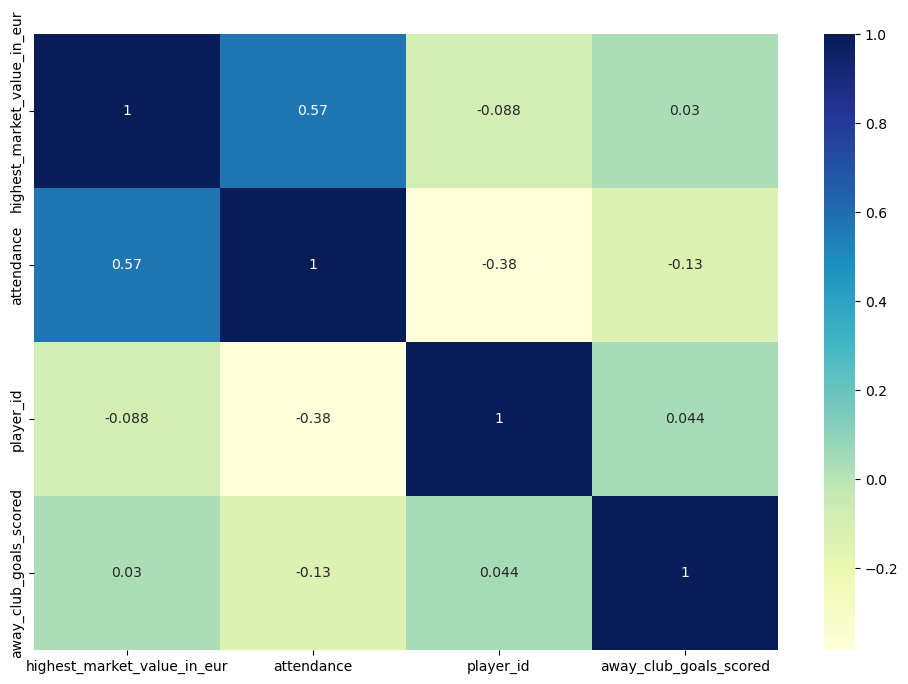

In [150]:
###### Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(simple_df_scaled.corr(), annot=True, cmap="YlGnBu")

In [151]:
###### To show the correlation values from most negatively correlated to the most positively correlated.
sorted_corr=simple_df_scaled.corr()[['highest_market_value_in_eur']].sort_values(by='highest_market_value_in_eur', ascending=False)
sorted_corr

,highest_market_value_in_eur
highest_market_value_in_eur,1.000000
attendance,0.568217
away_club_goals_scored,0.029943
player_id,-0.087958


##### one feature attendance

In [153]:
X1=np.array(simple_df_scaled['attendance']).reshape((-1, 1))
y=np.array(simple_df_scaled['highest_market_value_in_eur'])

In [154]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1=s_model1.score(X_train1, y_train1)
y_pred1 = s_model1.predict(X_test1)
#print('predicted response:', y_pred, sep='\n')

In [155]:
s_r_sq1

0.3181589597621901

In [156]:
print('Intercept: \n', s_model1.intercept_)
print('slope:', s_model1.coef_)

Intercept: 
 0.007787710471767079
slope: [0.56384028]


In [157]:
#### Evaluating the model performance

In [158]:
MSE1=mean_squared_error(y_test1, y_pred1)
MAE1=mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE = ', MSE1)
print('RMSE = ', RMSE1)
print('MAE = ', MAE1)
# R2 Score
r2_1 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is", r2_1)

MSE =  0.6596017959365621
RMSE =  0.8121587258267697
MAE =  0.6694213155057631
The R2 score of the model is 0.3325356836043163


In [159]:
## 2. Two features:  attendance and player_id

In [160]:
# Two features
X2 =simple_df_scaled [[ 'attendance' , 'player_id']].values.reshape(-1,2)
X2.shape

(4198, 2)

In [161]:
#### Splitting data and training model

In [162]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
model_mul1 = LinearRegression().fit(X_train2, y_train2)

print('Intercept: \n', model_mul1.intercept_)
print('slope:', model_mul1.coef_)

Intercept: 
 0.008700238182052629
slope: [0.6211999  0.15472377]


In [163]:
#### Evaluating the model performance

In [164]:
MSE2=mean_squared_error(y_test2, model_mul1.predict(X_test2))
RMSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2), squared=False)
MAE2= mean_absolute_error(y_test2, model_mul1.predict(X_test2))
print('MSE = ', MSE2)
print('RMSE = ', RMSE2)
print('MAE = ', MAE2)
# R2 Score
r2_2 = r2_score(y_test2, model_mul1.predict(X_test2))
print(f"The R2 score of the model is", r2_2)


MSE =  0.640216300414353
RMSE =  0.800135176338569
MAE =  0.6516295759858305
The R2 score of the model is 0.3521522562037749


In [165]:
# Three features
X3 = simple_df_scaled[[ 'attendance' , 'player_id','away_club_goals_scored']].values.reshape(-1,3)


In [166]:
#### Splitting data and training model

In [167]:
X3 = simple_df_scaled[['attendance' , 'player_id','away_club_goals_scored']].values.reshape(-1,3)
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
model_mul2 = LinearRegression().fit(X_train3, y_train3)
print('Intercept: \n', model_mul2.intercept_)
print('slope:', model_mul2.coef_)

Intercept: 
 0.0071516814365434524
slope: [0.63611093 0.15639409 0.10423868]


In [168]:
#### Evaluating the model performance

In [169]:
MSE3=mean_squared_error(y_test3, model_mul2.predict(X_test3))
RMSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3), squared=False)
MAE3= mean_absolute_error(y_test3, model_mul2.predict(X_test3))
print('MSE = ', MSE3)
print('RMSE = ', RMSE3)
print('MAE = ', MAE3)
# R2 Score
r2_3 = r2_score(y_test3, model_mul2.predict(X_test3))
print(f"The R2 score of the model is", r2_3)


MSE =  0.6260941117423405
RMSE =  0.7912610894909091
MAE =  0.6363261757623255
The R2 score of the model is 0.36644278280034326


In [170]:
# The value of R2 is increased from 0.35 to 0.36.

In [171]:
## Proceeding with four features: 'attendance' , 'player_id','away_club_goals_scored

In [172]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [173]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


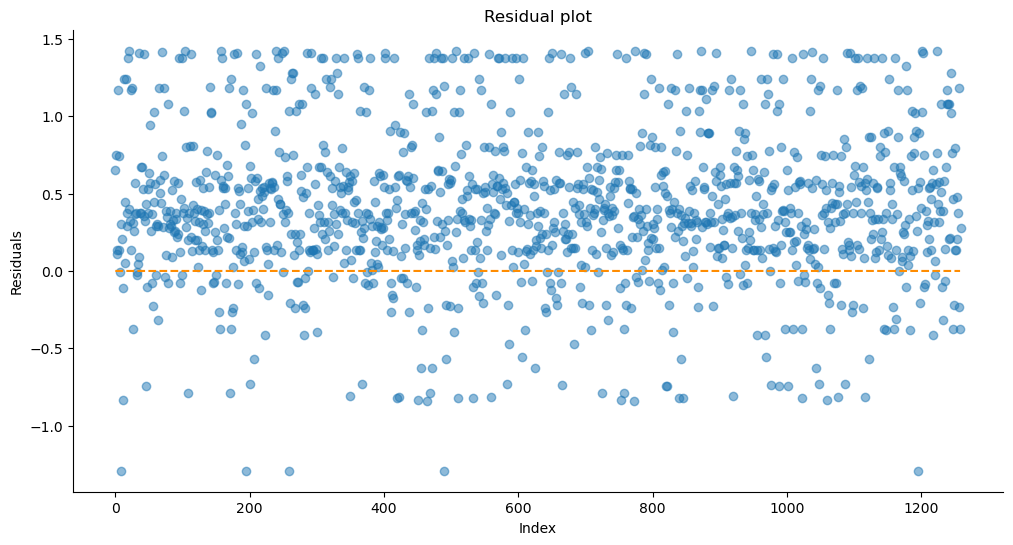

In [174]:
homoscedasticity_assumption(model_mul2, X_test3, y_test3)

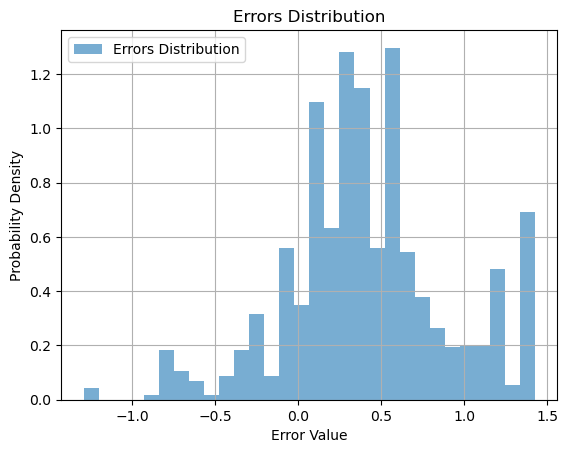

In [175]:
df_results = calculate_residuals(model_mul2, X_test3, y_test3)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# Reshape the new data into a 2D array for prediction
new_data_array = np.reshape(new_data_df[['attendance' , 'player_id','away_club_goals_scored']], (1, -1))

In [177]:
# Predict the target value for the new data
predicted_value = model_mul2.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value[0])

Predicted value for the new data: -0.4122237779989486


In [178]:
# Original value of the new data
new_data_df['highest_market_value_in_eur']

4198   -1.004996
Name: highest_market_value_in_eur, dtype: float64

''''Overall Interpretation:
The performance of this multiple linear regression model is moderate and demonstrates room for improvement:

Errors (MSE, MAE, RMSE): The error metrics are higher compared to a potential benchmark model, indicating that this model has less accurate predictions overall.
R² Score: The R² value of 0.366 shows that the independent variables explain only about one-third of the variability in the dependent variable, leaving a significant portion unexplained. This suggests that additional relevant features may need to be included to enhance the model's predictive power.
Recommendations for Improvement:
Feature Engineering:

Explore additional features, such as weather conditions, team statistics, or historical performance, to improve predictive performance.
Evaluate interaction effects or non-linear relationships between variables.
Regularization Techniques:

Apply regularization methods like Ridge or Lasso regression to address potential multicollinearity and improve model stability.
Alternative Models:

Consider non-linear models or ensemble techniques like decision trees, random forests, or gradient boosting to capture complex relationships.
Conclusion:
While the model explains a moderate portion (36.6%) of the variability and provides reasonable predictions, its performance is not as strong as the earlier example. Incorporating additional variables and exploring advanced techniques could improve both accuracy and explanatory power''''

In [180]:
#### Visualization of data

0.6361109304928423


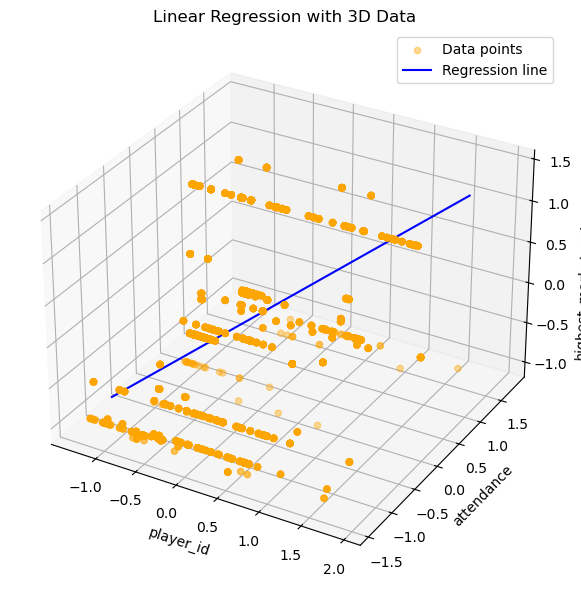

In [181]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_2 = simple_df_scaled[[ 'attendance' , 'player_id']].values.reshape(-1,2)
Y =simple_df_scaled['highest_market_value_in_eur']

x = X_2[:, 0]
y = X_2[:, 1]
z = Y

# Generate data for regression line
x1_line = np.arange(min(x), max(x), 0.1)
#x2_line = np.arange(min(y), max(y),0.1)
x2_line = np.array([model_mul2.coef_[0] * val + (-model_mul2.intercept_ + model_mul2.coef_[1] * np.mean(y)) for val in x1_line])
y_line = model_mul2.coef_[0] * x1_line + model_mul2.coef_[1] * x2_line + model_mul2.intercept_

print(model_mul2.coef_[0])
#print(x1_line) #global radiation
#print(x2_line)
# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(x, y, z, c='orange', marker='o', alpha=0.4, label='Data points')

# Plot regression line
ax.plot(x1_line, x2_line, y_line, c='b', label='Regression line')

# Set labels and title
ax.set_xlabel('player_id')
ax.set_ylabel('attendance')
ax.set_zlabel('highest_market_value_in_eur')
ax.set_title('Linear Regression with 3D Data')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

In [182]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game'],
      dtype='object')

##  team comparison

In [184]:
import pandas as pd
from scipy.stats import ttest_ind


# Add 'home_club_name' and 'away_club_name' columns if they don't exist
df['home_club_name'] = df.get('home_club_name', 'Unknown Home Club')
df['away_club_name'] = df.get('away_club_name', 'Unknown Away Club')

# Filter dataset for two specific teams
team_1 = 'FC Bayern Munich'
team_2 = 'Borussia Dortmund'

# Correct filtering for attendance based on home and away team names
attendance_team_1 = df.loc[(df['home_club_name'] == team_1) | (df['away_club_name'] == team_1), 'attendance'].dropna()
attendance_team_2 = df.loc[(df['home_club_name'] == team_2) | (df['away_club_name'] == team_2), 'attendance'].dropna()

# Calculate sample means and standard deviations
mean_1, std_1 = attendance_team_1.mean(), attendance_team_1.std()
mean_2, std_2 = attendance_team_2.mean(), attendance_team_2.std()

print(f"Sample Mean Attendance for {team_1}: {mean_1:.2f}, Sample Std Dev: {std_1:.2f}")
print(f"Sample Mean Attendance for {team_2}: {mean_2:.2f}, Sample Std Dev: {std_2:.2f}")

# Perform t-test
t_stat, p_value = ttest_ind(attendance_team_1, attendance_team_2, equal_var=False)

# Hypothesis Testing
alpha = 0.05
print("\n--- Hypothesis Test Results ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference in attendance between {team_1} and {team_2}.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in attendance between {team_1} and {team_2}.")


Sample Mean Attendance for FC Bayern Munich: 61515.95, Sample Std Dev: 18433.06
Sample Mean Attendance for Borussia Dortmund: 38750.79, Sample Std Dev: 20634.62

--- Hypothesis Test Results ---
T-statistic: 10.1868
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in attendance between FC Bayern Munich and Borussia Dortmund.


''''
- Statistical Conclusion:
Sample Mean Attendance:
FC Bayern Munich: 61,515.95
Borussia Dortmund: 38,750.79
Standard Deviation:
FC Bayern Munich: 18,433.06
Borussia Dortmund: 20,634.62
T-statistic: 10.1868
P-value: 0.0000 (very close to zero)
The p-value is significantly lower than the alpha value (0.05), leading us to reject the null hypothesis.
Conclusion: There is a statistically significant difference in attendance between FC Bayern Munich and Borussia Dortmund.
- Business Conclusion:
The findings indicate that FC Bayern Munich consistently attracts a significantly larger audience (61,515 on average) compared to Borussia Dortmund (38,750 on average). This difference could be attributed to:

Team Popularity: FC Bayern Munich's strong international reputation and consistent performance may result in higher fan engagement.
Stadium Capacity: FC Bayern Munich's stadium might have a higher seating capacity, allowing for larger attendance.
Marketing and Fan Base: FC Bayern Munich might have better marketing strategies, ticket sales, or stronger local and global fan bases.
Actionable Insights:

Borussia Dortmund could analyze FC Bayern's fan engagement strategies to improve their attendance.
Investments in stadium infrastructure, promotions, or fan engagement activities might help Borussia Dortmund increase their audience size.
Teams can further analyze season trends, pricing, or matchday factors to optimize attendance.''''

#  KKN for attendance


In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [188]:
# Add 'home_club_name' and 'away_club_name' columns if they don't exist
df['home_club_name'] = df.get('home_club_name', 'Unknown Home Club')
df['away_club_name'] = df.get('away_club_name', 'Unknown Away Club')

# Filter dataset for attendance
attendance = df['attendance'].dropna()

# Create High and Low attendance categories based on median value
median_attendance = attendance.median()
df['attendance_category'] = df['attendance'].apply(lambda x: 'High' if x >= median_attendance else 'Low')

# Features: home and away club names, Target: attendance_category
X = df[['home_club_name', 'away_club_name']]
y = df['attendance_category']

# Encode categorical features
le_home = LabelEncoder()
le_away = LabelEncoder()
X['home_club_name'] = le_home.fit_transform(X['home_club_name'])
X['away_club_name'] = le_away.fit_transform(X['away_club_name'])

# Split the dataset into training and testing

In [189]:
# Split the dataset into training and testing

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [191]:
# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Display categories
print(f"Median Attendance: {median_attendance:.2f}")
print("Attendance categorized as 'High' and 'Low' based on median.")

Accuracy: 0.80

Classification Report:

              precision    recall  f1-score   support

        High       0.73      0.93      0.82       398
         Low       0.92      0.69      0.79       442

    accuracy                           0.80       840
   macro avg       0.82      0.81      0.80       840
weighted avg       0.83      0.80      0.80       840

Median Attendance: 31084.00
Attendance categorized as 'High' and 'Low' based on median.


In [192]:
### Find optimal value of K

Minimum error:- 0.1976190476190476 at K = 5


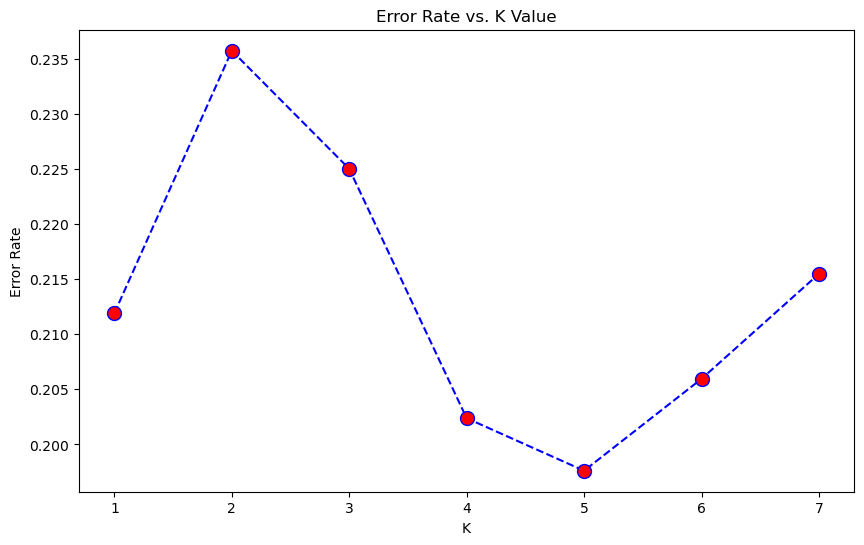

In [193]:
from sklearn import neighbors
error_rate = []
for i in range(1,8):
    clf_iris = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_iris.fit(X_train,y_train)
    pred_d = clf_iris.predict(X_test)
    error_rate.append(np.mean(pred_d != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [194]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [195]:
print('recall:', recall_score(y_test, y_pred, average='micro'))
print('f1-score:', f1_score(y_test, y_pred, average='micro'))
print('precision:', precision_score(y_test, y_pred, average='micro'))

recall: 0.8023809523809524
f1-score: 0.8023809523809524
precision: 0.8023809523809524


ROC AUC Value: 0.9051


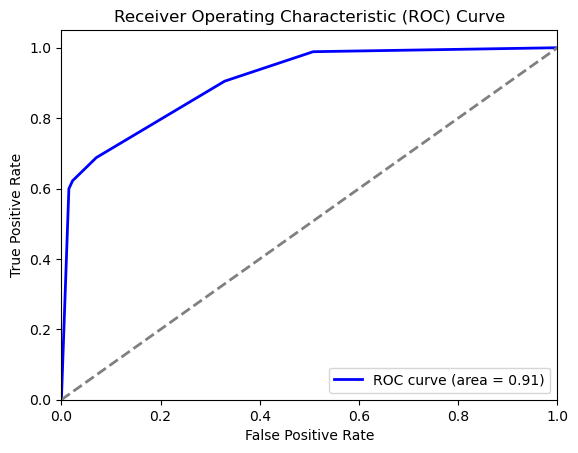

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc  # Importing the required functions
import matplotlib.pyplot as plt

# Add 'home_club_name' and 'away_club_name' columns if they don't exist
df['home_club_name'] = df.get('home_club_name', 'Unknown Home Club')
df['away_club_name'] = df.get('away_club_name', 'Unknown Away Club')

# Filter dataset for attendance
attendance = df['attendance'].dropna()

# Create High and Low attendance categories based on median value
median_attendance = attendance.median()
df['attendance_category'] = df['attendance'].apply(lambda x: 'High' if x >= median_attendance else 'Low')

# Features: home and away club names, Target: attendance_category
X = df[['home_club_name', 'away_club_name']]
y = df['attendance_category']

# Encode categorical features
le_home = LabelEncoder()
le_away = LabelEncoder()
le_target = LabelEncoder()
X['home_club_name'] = le_home.fit_transform(X['home_club_name'])
X['away_club_name'] = le_away.fit_transform(X['away_club_name'])
y = le_target.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict probabilities
y_probs = knn.predict_proba(X_test)[:, 1]  # Probability of class 1 (High attendance)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Display ROC AUC Value
print(f"ROC AUC Value: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()






"""" Final Interpretation:
Model Performance Overview:
Accuracy (0.80):
The K-Nearest Neighbors (KNN) model achieves an 80% accuracy in predicting the attendance class, indicating a high percentage of correct predictions. However, accuracy alone does not fully capture the model's effectiveness, especially for nuanced patterns in the data.
Recall (0.802):
With a recall of 80.2%, the model successfully identifies 80.2% of the true positive cases (correctly predicting the attendance class). This demonstrates strong performance in capturing the actual patterns related to attendance levels.

Precision (0.802):
Precision is also 80.2%, meaning that when the model predicts a specific attendance class, 80.2% of the predictions are correct. This balance between precision and recall indicates that the model performs reliably across both metrics.

F1-Score (0.802):
The F1-score, a harmonic mean of precision and recall, is 80.2%, reflecting a balanced performance in identifying attendance patterns without overemphasizing either precision or recall.

ROC AUC Value (0.9051):
The high ROC AUC value (90.51%) highlights the model's strong ability to distinguish between classes of attendance. This is a significant indicator of the model's robustness and reliability in separating high and low attendance levels."""""



#  hypothesis testing for goals

In [199]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game',
       'home_club_name', 'attendance_category'],
      dtype='object')

In [200]:

from scipy import stats



# Select relevant columns and drop missing values
df_goals = df[['home_club_goals', 'away_club_goals']].dropna()

# Sample and Population Calculations for Home Goals
home_goals = df_goals['home_club_goals']

home_sample_mean = np.mean(home_goals)
home_sample_sd = np.std(home_goals, ddof=1)  # Sample SD (ddof=1)
home_population_sd = np.std(home_goals)      # Population SD
home_population_mean = np.mean(home_goals)   # Population Mean

# Sample and Population Calculations for Away Goals
away_goals = df_goals['away_club_goals']

away_sample_mean = np.mean(away_goals)
away_sample_sd = np.std(away_goals, ddof=1)  # Sample SD (ddof=1)
away_population_sd = np.std(away_goals)      # Population SD
away_population_mean = np.mean(away_goals)   # Population Mean

# Print Sample and Population Statistics
print("Home Goals Statistics:")
print(f"Sample Mean: {home_sample_mean:.2f}")
print(f"Sample SD: {home_sample_sd:.2f}")
print(f"Population Mean: {home_population_mean:.2f}")
print(f"Population SD: {home_population_sd:.2f}\n")

print("Away Goals Statistics:")
print(f"Sample Mean: {away_sample_mean:.2f}")
print(f"Sample SD: {away_sample_sd:.2f}")
print(f"Population Mean: {away_population_mean:.2f}")
print(f"Population SD: {away_population_sd:.2f}\n")

# Hypothesis Testing: t-test for Home and Away Goals
# H0: No difference in mean goals between home and away teams
# H1: There is a difference in mean goals between home and away teams

t_stat, p_value = stats.ttest_ind(home_goals, away_goals)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject H₀: Significant difference between home and away goals.")
else:
    print("Fail to reject H₀: No significant difference between home and away goals.")




Home Goals Statistics:
Sample Mean: 1.89
Sample SD: 1.52
Population Mean: 1.89
Population SD: 1.52

Away Goals Statistics:
Sample Mean: 1.56
Sample SD: 1.47
Population Mean: 1.56
Population SD: 1.47

T-statistic: 10.21
P-value: 0.0000
Reject H₀: Significant difference between home and away goals.


In [201]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game',
       'home_club_name', 'attendance_category'],
      dtype='object')

# K-MEANS CLUSTERING

In [203]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

# Select relevant columns for player attributes and demographics
player_columns = [
    'country_of_birth', 'date_of_birth', 'foot', 'position_x', 'sub_position',
    'market_value_in_eur', 'highest_market_value_in_eur', 'team_captain',
    'goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played', 'goals_per_game'
]

# Filter the dataset to include only the selected columns and drop rows with missing values
df_players = df[player_columns].dropna()

# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['country_of_birth', 'foot', 'position_x', 'sub_position']

for col in categorical_columns:
    le = LabelEncoder()
    df_players[col] = le.fit_transform(df_players[col])
    label_encoders[col] = le

# Convert 'date_of_birth' to age in years
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'], errors='coerce')
current_year = pd.Timestamp.now().year
df_players['age'] = current_year - df_players['date_of_birth'].dt.year

# Drop the original 'date_of_birth' column
df_players.drop(columns=['date_of_birth'], inplace=True)

# Drop rows where 'age' is NaN
df_players = df_players.dropna(subset=['age'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_players)



In [204]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Step 1: Build and train the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed
df_players['cluster'] = kmeans.fit_predict(scaled_data)

# Step 2: Dimensionality Reduction (PCA) to visualize the clusters in 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])
df_pca['cluster'] = df_players['cluster']

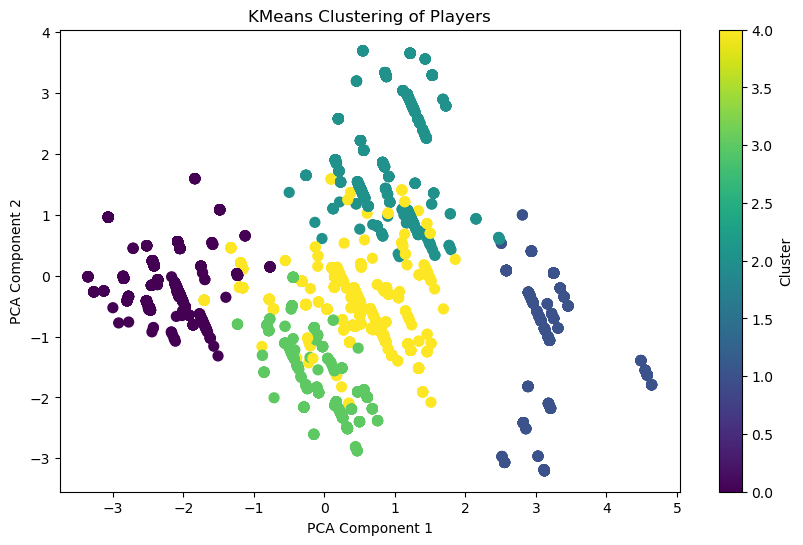

In [205]:
# Step 3: Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['pca1'], df_pca['pca2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering of Players')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


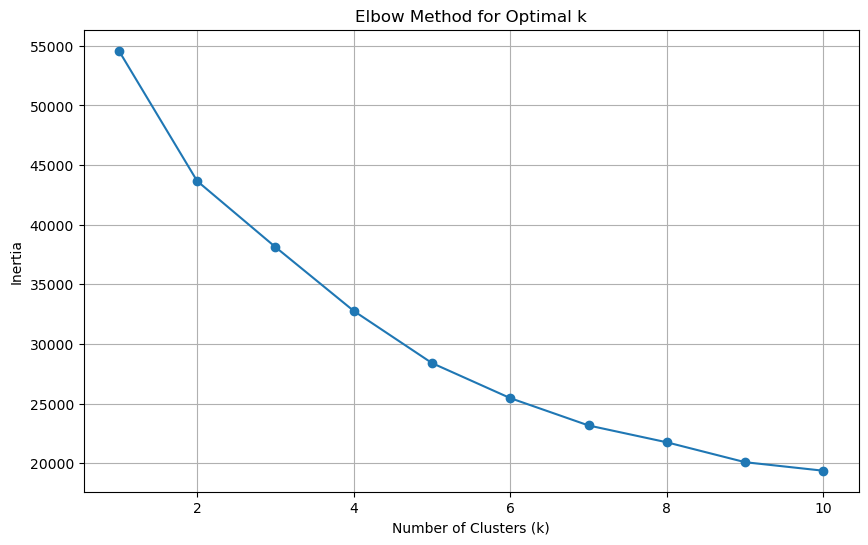

In [206]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Curve, choose the optimal number of clusters (e.g., k=4)
optimal_k = 4  # Replace with your chosen k from the Elbow curve

# Perform K-Means Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_players['Cluster'] = kmeans.fit_predict(scaled_data)

# View the resulting clusters
#df_players.head()


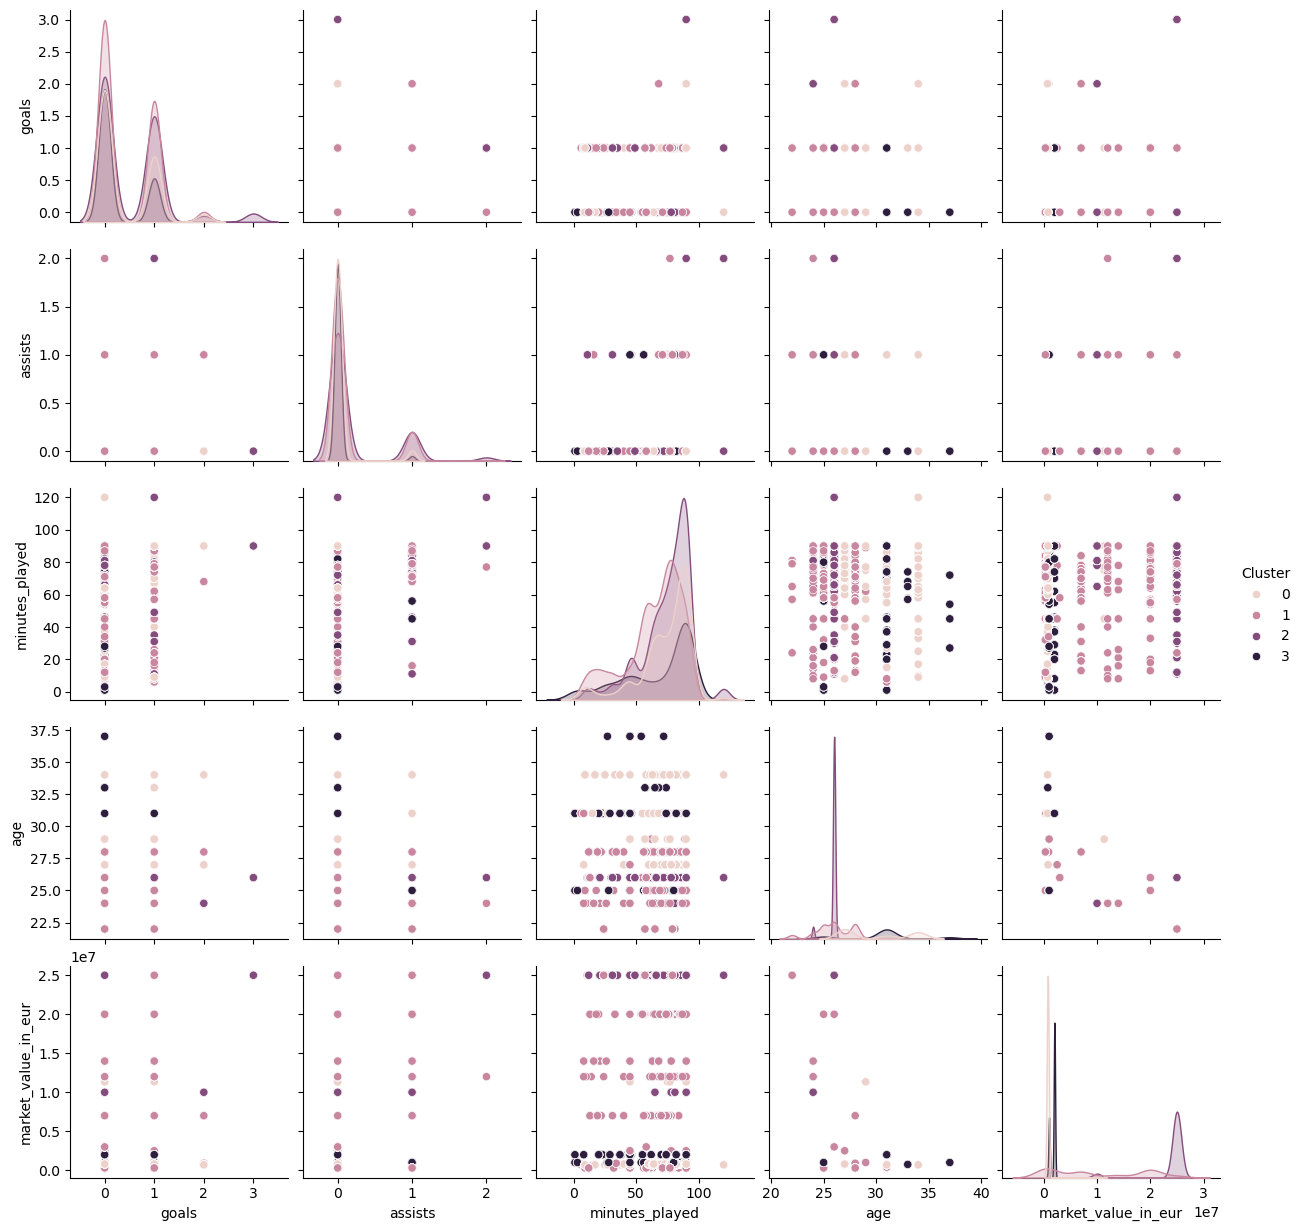

   country_of_birth  foot  position_x  sub_position  market_value_in_eur  \
0                 1     2           9             8             700000.0   
1                 1     2           9             8             700000.0   
2                 1     2           9             8             700000.0   
3                 1     2           9             8             700000.0   
4                 1     2           9             8             700000.0   

   highest_market_value_in_eur  team_captain  goals  assists  yellow_cards  \
0                    5000000.0             0      0        0             0   
1                    5000000.0             0      0        0             0   
2                    5000000.0             0      0        0             0   
3                    5000000.0             0      0        0             0   
4                    5000000.0             0      0        0             0   

   red_cards  minutes_played  goals_per_game  age  cluster  Cluster  
0   

In [207]:
# Visualize the clusters using a pairplot (selecting a few relevant features)
sns.pairplot(df_players, hue='Cluster', vars=['goals', 'assists', 'minutes_played', 'age', 'market_value_in_eur'])
plt.show()

# Display the first few rows of the clustered data
print(df_players.head())


In [208]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Fit the KMeans model with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_players['Cluster'] = kmeans.fit_predict(scaled_data)

# 1. Silhouette Score
sil_score = silhouette_score(scaled_data, df_players['Cluster'])
print(f'Silhouette Score: {sil_score}')

# 2. Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, df_players['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')



Silhouette Score: 0.28391958579145704
Davies-Bouldin Index: 1.5707632914635756


In [209]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game',
       'home_club_name', 'attendance_category'],
      dtype='object')

"""" Evaluation Metrics:
Silhouette Score (0.2839):

The silhouette score measures how well each data point fits within its assigned cluster compared to other clusters.
A score of 0.2839 indicates overlapping clusters or that some data points might be misclassified or ambiguously assigned. Values closer to 1 suggest well-separated, compact clusters, while values near 0 suggest poor separation.
Davies-Bouldin Index (1.57):

This index evaluates the average similarity ratio of intra-cluster distances to inter-cluster distances (lower values indicate better clustering).
A value of 1.57 indicates moderate cluster overlap—clusters are not perfectly distinct but not completely indistinguishable.""""


In [211]:
df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x',
       'game_lineups_id', 'number', 'player_name_y', 'team_captain',
       'position_x', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'foot',
       'market_value_in_eur', 'highest_market_value_in_eur', 'goals_per_game',
       'home_club_name', 'attendance_category'],
      dtype='object')